# PW4: Genetic algorithms for optimization
*Alexandra Korukova, Samuel Mayor*  
*HEIG-VD - MLG - 30.05.2019*

In [1]:
from scipy import sin, cos, tan, arctan, arctan2, arccos, pi
import numpy as np
import math
from pyevolve import G1DList
from pyevolve import GSimpleGA
from pyevolve import GAllele
from pyevolve import Mutators
from pyevolve import Initializators
from pyevolve import DBAdapters
from pyevolve import Crossovers
from pyevolve import Consts
from pyevolve import Selectors
import sys, random
import matplotlib.pyplot as plt

In [2]:
LAT = [16.47, 16.47, 20.09, 22.39, 25.23, 22.00, 20.47, 17.20, 16.30, 14.05, 16.53, 21.52, 19.41, 20.09]

LON = [96.10, 94.44, 92.54, 93.37, 97.24, 96.05, 97.02, 96.29, 97.38, 98.12, 97.38, 95.59, 97.13, 94.55]

In [3]:
# based on resolution of the TSP problem using GA, found on: 
# http://pyevolve.sourceforge.net/examples.html#example-12-the-travelling-salesman-problem-tsp

def tour_length(matrix, tour):
   """ Returns the total length of the tour """
   total=0
   num_cities=len(tour)
   for i in range(num_cities):
      j=(i+1)%num_cities
      city_i=tour[i]
      city_j=tour[j]
      total+=matrix[city_i,city_j]
   return total

def G1DListTSPInitializator(genome, **args):
   """ The initializator for the TSP """
   genome.clearList()
   lst = [i for i in xrange(genome.getListSize())]

   for i in xrange(genome.getListSize()):
      choice = random.choice(lst)
      lst.remove(choice)
      genome.append(choice)

spherical_distances = []
coords = []

def eval_func(chromosome):
   """ The evaluation function """
   global spherical_distances
   return tour_length(spherical_distances, chromosome)

In [4]:
# source : https://www.johndcook.com/blog/python_longitude_latitude/
def spherical_distance(lat1, long1, lat2, long2):

    # Convert latitude and longitude to
    # spherical coordinates in radians.
    degrees_to_radians = math.pi/180.0

    # phi = 90 - latitude
    phi1 = (90.0 - lat1)*degrees_to_radians
    phi2 = (90.0 - lat2)*degrees_to_radians

    # theta = longitude
    theta1 = long1*degrees_to_radians
    theta2 = long2*degrees_to_radians

    # Compute spherical distance from spherical coordinates.

    # For two locations in spherical coordinates
    # (1, theta, phi) and (1, theta', phi')
    # cosine( arc length ) =
    # sin phi sin phi' cos(theta-theta') + cos phi cos phi'
    # distance = rho * arc length

    cos = (math.sin(phi1)*math.sin(phi2)*math.cos(theta1 - theta2) +
    math.cos(phi1)*math.cos(phi2))
    arc = math.acos( cos )

    # Remember to multiply arc by the radius of the earth
    # in your favorite set of units to get length.
    return arc*6371

In [5]:
def init_ga(nb_generations, crossover_rate, mutation_rate, population_size):
    '''
    returns the resulting GA
    '''
    genome = G1DList.G1DList(len(coords))

    genome.evaluator.set(eval_func) # define the fitness function to evaluate the performance of the solution
    genome.mutator.set(Mutators.G1DListMutatorSwap)
    genome.crossover.set(Crossovers.G1DListCrossoverOX)
    genome.initializator.set(G1DListTSPInitializator)

    # set parameters
    ga = GSimpleGA.GSimpleGA(genome)
    ga.setGenerations(nb_generations)
    ga.setMinimax(Consts.minimaxType["minimize"])
    ga.setCrossoverRate(crossover_rate)
    ga.setMutationRate(mutation_rate)
    ga.setPopulationSize(population_size)
    return ga

In [6]:
# creates latitude/longitude tuples for each city
coords = []
for i in range(len(LAT)):
    coords.append((LAT[i], LON[i]))

# calculate distances between each city pairs
spherical_distances = np.zeros((14, 14))
for i,c1 in enumerate(coords):
    for j,c2 in enumerate(coords):
        spherical_distances[i, j] = spherical_distance(c1[0], c1[1], c2[0], c2[1])

# based on resolution of the TSP problem using GA, found on: 
# http://pyevolve.sourceforge.net/examples.html#example-12-the-travelling-salesman-problem-tsp

# init
ga = init_ga(200, 1, 0.03, 100)
ga.evolve(freq_stats=100)
best = ga.bestIndividual()
print best
print(tour_length(spherical_distances, best))


Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8217.82(8071.13)/4562.61(4807.40)/6848.18(6848.18)]
Gen. 100 (50.00%): Max/Min/Avg Fitness(Raw) [5254.25(7464.83)/4293.37(4078.37)/4378.54(4378.54)]
Gen. 200 (100.00%): Max/Min/Avg Fitness(Raw) [5224.59(7062.79)/4265.28(4078.37)/4353.82(4353.82)]
Total time elapsed: 2.301 seconds.
- GenomeBase
	Score:			 4078.366524
	Fitness:		 4265.280351

	Params:		 {}

	Slot [Evaluator] (Count: 1)
		Name: eval_func - Weight: 0.50
		Doc:  The evaluation function 
	Slot [Initializator] (Count: 1)
		Name: G1DListTSPInitializator - Weight: 0.50
		Doc:  The initializator for the TSP 
	Slot [Mutator] (Count: 1)
		Name: G1DListMutatorSwap - Weight: 0.50
		Doc:  The mutator of G1DList, Swap Mutator
   
   .. note:: this mutator is :term:`Data Type Independent`

   
	Slot [Crossover] (Count: 1)
		Name: G1DListCrossoverOX - Weight: 0.50
		Doc:  The OX Crossover for G1DList  (order crossover) 

- G1DList
	List size:	 14
	List:		 [0, 7, 5, 4, 3, 2, 1, 13, 11, 6, 12, 10,

### Testing number of generations

In [7]:
nb_generations = np.arange(1, 2002, 100)
bests = []
for g in nb_generations:
    for i in np.arange(10):
        ga = init_ga(g, 1, 0.03, 80)
        ga.evolve(freq_stats=100)
        best_i = ga.bestIndividual()
        best_length = tour_length(spherical_distances, best_i)
    bests.append(np.mean(best_length))

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8112.58(8264.85)/5127.00(4943.04)/6760.48(6760.48)]
Gen. 1 (100.00%): Max/Min/Avg Fitness(Raw) [6167.94(8378.53)/5006.37(4719.11)/5139.95(5139.95)]
Total time elapsed: 0.030 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8212.47(8785.39)/5949.01(5574.51)/6843.72(6843.72)]
Gen. 1 (100.00%): Max/Min/Avg Fitness(Raw) [6735.90(6786.39)/5052.70(5027.50)/5613.25(5613.25)]
Total time elapsed: 0.028 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8055.73(8468.61)/5610.07(5270.87)/6713.11(6713.11)]
Gen. 1 (100.00%): Max/Min/Avg Fitness(Raw) [6614.48(7592.74)/5271.86(5058.71)/5512.07(5512.07)]
Total time elapsed: 0.026 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8151.20(8145.94)/5020.80(5027.66)/6792.67(6792.67)]
Gen. 1 (100.00%): Max/Min/Avg Fitness(Raw) [6270.40(7015.39)/4934.96(4727.96)/5225.34(5225.34)]
Total time elapsed: 0.038 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8272.87(8357.28)/5289.42(5191.18)/6894.06(6894.06)]
Gen. 1

Gen. 200 (99.50%): Max/Min/Avg Fitness(Raw) [4418.46(5598.12)/3556.17(3354.52)/3682.05(3682.05)]
Gen. 201 (100.00%): Max/Min/Avg Fitness(Raw) [4505.51(6295.57)/3636.36(3354.52)/3754.59(3754.59)]
Total time elapsed: 1.661 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8046.83(8597.71)/5515.53(5026.66)/6705.69(6705.69)]
Gen. 100 (49.75%): Max/Min/Avg Fitness(Raw) [4605.63(6009.29)/3680.41(3392.19)/3838.03(3838.03)]
Gen. 200 (99.50%): Max/Min/Avg Fitness(Raw) [4541.94(5814.61)/3638.46(3392.19)/3784.95(3784.95)]
Gen. 201 (100.00%): Max/Min/Avg Fitness(Raw) [4469.97(5880.57)/3609.96(3392.19)/3724.97(3724.97)]
Total time elapsed: 2.261 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8229.85(8286.93)/5040.27(4964.61)/6858.21(6858.21)]
Gen. 100 (49.75%): Max/Min/Avg Fitness(Raw) [5746.22(6642.89)/4678.24(4575.00)/4788.52(4788.52)]
Gen. 200 (99.50%): Max/Min/Avg Fitness(Raw) [5362.99(5994.08)/4305.55(4190.03)/4469.16(4469.16)]
Gen. 201 (100.00%): Max/Min/Avg Fitness(Raw) [5360.87(6589.39

Gen. 300 (74.81%): Max/Min/Avg Fitness(Raw) [4551.22(5662.67)/3673.14(3497.97)/3792.69(3792.69)]
Gen. 400 (99.75%): Max/Min/Avg Fitness(Raw) [4693.31(6480.46)/3785.32(3497.97)/3911.09(3911.09)]
Gen. 401 (100.00%): Max/Min/Avg Fitness(Raw) [4582.05(6237.27)/3717.22(3497.97)/3818.37(3818.37)]
Total time elapsed: 2.810 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8136.46(8801.43)/5560.94(4962.96)/6780.38(6780.38)]
Gen. 100 (24.94%): Max/Min/Avg Fitness(Raw) [4444.60(5477.29)/3557.93(3354.52)/3703.83(3703.83)]
Gen. 200 (49.88%): Max/Min/Avg Fitness(Raw) [4507.81(5801.87)/3608.85(3354.52)/3756.51(3756.51)]
Gen. 300 (74.81%): Max/Min/Avg Fitness(Raw) [4467.77(6566.63)/3626.61(3354.52)/3723.14(3723.14)]
Gen. 400 (99.75%): Max/Min/Avg Fitness(Raw) [4423.30(6800.91)/3607.61(3354.52)/3686.09(3686.09)]
Gen. 401 (100.00%): Max/Min/Avg Fitness(Raw) [4440.39(6022.58)/3590.12(3354.52)/3700.33(3700.33)]
Total time elapsed: 2.835 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7992.49(8566.52)

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8081.14(8400.70)/5043.21(4641.98)/6734.28(6734.28)]
Gen. 100 (19.96%): Max/Min/Avg Fitness(Raw) [5076.05(6102.85)/4040.04(3809.45)/4230.04(4230.04)]
Gen. 200 (39.92%): Max/Min/Avg Fitness(Raw) [5048.78(6285.42)/4046.21(3809.45)/4207.31(4207.31)]
Gen. 300 (59.88%): Max/Min/Avg Fitness(Raw) [4935.92(6036.08)/3983.28(3809.45)/4113.27(4113.27)]
Gen. 400 (79.84%): Max/Min/Avg Fitness(Raw) [4808.14(6271.21)/3877.08(3640.27)/4006.78(4006.78)]
Gen. 500 (99.80%): Max/Min/Avg Fitness(Raw) [4743.31(7003.90)/3871.79(3640.27)/3952.76(3952.76)]
Gen. 501 (100.00%): Max/Min/Avg Fitness(Raw) [4761.86(5999.08)/3840.06(3640.27)/3968.21(3968.21)]
Total time elapsed: 3.535 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8185.37(8583.21)/5466.01(5070.82)/6821.14(6821.14)]
Gen. 100 (19.96%): Max/Min/Avg Fitness(Raw) [4699.43(5847.52)/3756.67(3522.84)/3916.19(3916.19)]
Gen. 200 (39.92%): Max/Min/Avg Fitness(Raw) [4593.63(6576.51)/3743.02(3522.84)/3828.03(3828.03)]


Gen. 600 (99.83%): Max/Min/Avg Fitness(Raw) [4581.98(6414.71)/3724.09(3497.97)/3818.32(3818.32)]
Gen. 601 (100.00%): Max/Min/Avg Fitness(Raw) [4531.23(5897.33)/3677.04(3497.97)/3776.03(3776.03)]
Total time elapsed: 4.385 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8129.45(8166.31)/5068.94(5022.54)/6774.55(6774.55)]
Gen. 100 (16.64%): Max/Min/Avg Fitness(Raw) [4449.15(6094.64)/3597.93(3354.52)/3707.62(3707.62)]
Gen. 200 (33.28%): Max/Min/Avg Fitness(Raw) [4389.34(5753.88)/3551.94(3354.52)/3657.79(3657.79)]
Gen. 300 (49.92%): Max/Min/Avg Fitness(Raw) [4370.99(5753.88)/3543.13(3354.52)/3642.49(3642.49)]
Gen. 400 (66.56%): Max/Min/Avg Fitness(Raw) [4444.19(6961.68)/3624.16(3354.52)/3703.49(3703.49)]
Gen. 500 (83.19%): Max/Min/Avg Fitness(Raw) [4347.36(6207.83)/3547.61(3354.52)/3622.80(3622.80)]
Gen. 600 (99.83%): Max/Min/Avg Fitness(Raw) [4346.94(5544.05)/3521.43(3354.52)/3622.45(3622.45)]
Gen. 601 (100.00%): Max/Min/Avg Fitness(Raw) [4427.88(6165.50)/3589.92(3354.52)/3689.90(3689.9

Gen. 200 (28.53%): Max/Min/Avg Fitness(Raw) [4571.51(6638.97)/3687.04(3354.52)/3809.59(3809.59)]
Gen. 300 (42.80%): Max/Min/Avg Fitness(Raw) [4572.00(6800.91)/3693.96(3354.52)/3810.00(3810.00)]
Gen. 400 (57.06%): Max/Min/Avg Fitness(Raw) [4473.30(6452.39)/3625.62(3354.52)/3727.75(3727.75)]
Gen. 500 (71.33%): Max/Min/Avg Fitness(Raw) [4509.32(6299.20)/3638.52(3354.52)/3757.77(3757.77)]
Gen. 600 (85.59%): Max/Min/Avg Fitness(Raw) [4440.00(5598.12)/3565.31(3354.52)/3700.00(3700.00)]
Gen. 700 (99.86%): Max/Min/Avg Fitness(Raw) [4359.74(5679.21)/3534.18(3354.52)/3633.11(3633.11)]
Gen. 701 (100.00%): Max/Min/Avg Fitness(Raw) [4460.70(6142.45)/3606.06(3354.52)/3717.25(3717.25)]
Total time elapsed: 5.138 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8191.26(8683.51)/5730.13(5334.97)/6826.05(6826.05)]
Gen. 100 (14.27%): Max/Min/Avg Fitness(Raw) [4670.58(6442.38)/3797.10(3580.75)/3892.15(3892.15)]
Gen. 200 (28.53%): Max/Min/Avg Fitness(Raw) [4773.93(8282.20)/3904.79(3580.75)/3978.28(3978.28

Gen. 801 (100.00%): Max/Min/Avg Fitness(Raw) [4477.13(5934.63)/3603.48(3354.52)/3730.94(3730.94)]
Total time elapsed: 5.754 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8040.97(8773.19)/5805.54(5316.40)/6700.81(6700.81)]
Gen. 100 (12.48%): Max/Min/Avg Fitness(Raw) [4638.44(5749.29)/3768.23(3628.66)/3865.37(3865.37)]
Gen. 200 (24.97%): Max/Min/Avg Fitness(Raw) [4809.96(6323.36)/3876.84(3628.66)/4008.30(4008.30)]
Gen. 300 (37.45%): Max/Min/Avg Fitness(Raw) [4790.00(6752.39)/3886.69(3628.66)/3991.67(3991.67)]
Gen. 400 (49.94%): Max/Min/Avg Fitness(Raw) [4765.87(6641.42)/3869.54(3628.66)/3971.56(3971.56)]
Gen. 500 (62.42%): Max/Min/Avg Fitness(Raw) [4767.31(6561.49)/3867.14(3628.66)/3972.76(3972.76)]
Gen. 600 (74.91%): Max/Min/Avg Fitness(Raw) [4916.33(6051.08)/3900.58(3628.66)/4096.94(4096.94)]
Gen. 700 (87.39%): Max/Min/Avg Fitness(Raw) [4710.54(6316.05)/3827.98(3628.66)/3925.45(3925.45)]
Gen. 800 (99.88%): Max/Min/Avg Fitness(Raw) [4505.07(5480.36)/3580.36(3354.52)/3754.23(3754.23

Gen. 901 (100.00%): Max/Min/Avg Fitness(Raw) [4380.92(6852.12)/3591.79(3392.19)/3650.77(3650.77)]
Total time elapsed: 6.367 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8199.96(8366.73)/5070.83(4855.76)/6833.30(6833.30)]
Gen. 100 (11.10%): Max/Min/Avg Fitness(Raw) [4480.08(5884.74)/3616.42(3396.36)/3733.40(3733.40)]
Gen. 200 (22.20%): Max/Min/Avg Fitness(Raw) [4473.09(5896.27)/3613.72(3396.36)/3727.57(3727.57)]
Gen. 300 (33.30%): Max/Min/Avg Fitness(Raw) [4619.68(6832.41)/3732.70(3396.36)/3849.74(3849.74)]
Gen. 400 (44.40%): Max/Min/Avg Fitness(Raw) [4706.92(6535.60)/3764.50(3396.36)/3922.43(3922.43)]
Gen. 500 (55.49%): Max/Min/Avg Fitness(Raw) [4459.29(5843.71)/3604.39(3396.36)/3716.07(3716.07)]
Gen. 600 (66.59%): Max/Min/Avg Fitness(Raw) [4511.30(6262.49)/3650.36(3396.36)/3759.42(3759.42)]
Gen. 700 (77.69%): Max/Min/Avg Fitness(Raw) [4529.74(6249.67)/3659.35(3396.36)/3774.78(3774.78)]
Gen. 800 (88.79%): Max/Min/Avg Fitness(Raw) [4389.30(5749.66)/3566.34(3396.36)/3657.75(3657.75

Gen. 400 (44.40%): Max/Min/Avg Fitness(Raw) [4846.61(6602.27)/3836.39(3396.36)/4038.84(4038.84)]
Gen. 500 (55.49%): Max/Min/Avg Fitness(Raw) [4672.87(7585.48)/3789.05(3396.36)/3894.06(3894.06)]
Gen. 600 (66.59%): Max/Min/Avg Fitness(Raw) [4536.04(7435.63)/3700.69(3396.36)/3780.03(3780.03)]
Gen. 700 (77.69%): Max/Min/Avg Fitness(Raw) [4556.23(6494.11)/3684.10(3396.36)/3796.85(3796.85)]
Gen. 800 (88.79%): Max/Min/Avg Fitness(Raw) [4395.25(5884.74)/3574.90(3396.36)/3662.71(3662.71)]
Gen. 900 (99.89%): Max/Min/Avg Fitness(Raw) [4530.57(7511.88)/3698.86(3396.36)/3775.48(3775.48)]
Gen. 901 (100.00%): Max/Min/Avg Fitness(Raw) [4404.59(5898.96)/3580.19(3396.36)/3670.49(3670.49)]
Total time elapsed: 6.224 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8144.35(8447.50)/5565.65(5292.90)/6786.96(6786.96)]
Gen. 100 (9.99%): Max/Min/Avg Fitness(Raw) [4654.15(5982.17)/3736.62(3493.79)/3878.46(3878.46)]
Gen. 200 (19.98%): Max/Min/Avg Fitness(Raw) [4776.72(6589.33)/3832.04(3493.79)/3980.60(3980.60)

Gen. 300 (29.97%): Max/Min/Avg Fitness(Raw) [4416.84(6402.46)/3592.48(3354.52)/3680.70(3680.70)]
Gen. 400 (39.96%): Max/Min/Avg Fitness(Raw) [4478.98(5801.87)/3596.14(3354.52)/3732.48(3732.48)]
Gen. 500 (49.95%): Max/Min/Avg Fitness(Raw) [4435.44(6961.68)/3618.85(3354.52)/3696.20(3696.20)]
Gen. 600 (59.94%): Max/Min/Avg Fitness(Raw) [4671.83(6955.74)/3756.24(3354.52)/3893.19(3893.19)]
Gen. 700 (69.93%): Max/Min/Avg Fitness(Raw) [4366.24(6189.68)/3557.52(3354.52)/3638.54(3638.54)]
Gen. 800 (79.92%): Max/Min/Avg Fitness(Raw) [4515.50(6608.14)/3654.90(3354.52)/3762.92(3762.92)]
Gen. 900 (89.91%): Max/Min/Avg Fitness(Raw) [4359.97(5776.94)/3538.80(3354.52)/3633.31(3633.31)]
Gen. 1000 (99.90%): Max/Min/Avg Fitness(Raw) [4483.77(6959.54)/3647.92(3354.52)/3736.48(3736.48)]
Gen. 1001 (100.00%): Max/Min/Avg Fitness(Raw) [4412.05(5801.87)/3565.23(3354.52)/3676.71(3676.71)]
Total time elapsed: 6.935 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8064.50(8297.40)/5528.18(5321.58)/6720.41(6720.

Gen. 1101 (100.00%): Max/Min/Avg Fitness(Raw) [4504.00(5982.74)/3619.05(3354.52)/3753.33(3753.33)]
Total time elapsed: 8.050 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8213.51(8743.91)/5640.16(5173.50)/6844.59(6844.59)]
Gen. 100 (9.08%): Max/Min/Avg Fitness(Raw) [4594.69(5814.61)/3660.49(3392.19)/3828.91(3828.91)]
Gen. 200 (18.17%): Max/Min/Avg Fitness(Raw) [4494.92(5820.69)/3618.11(3392.19)/3745.77(3745.77)]
Gen. 300 (27.25%): Max/Min/Avg Fitness(Raw) [4538.87(5875.22)/3641.35(3392.19)/3782.40(3782.40)]
Gen. 400 (36.33%): Max/Min/Avg Fitness(Raw) [4358.11(6112.07)/3561.60(3392.19)/3631.76(3631.76)]
Gen. 500 (45.41%): Max/Min/Avg Fitness(Raw) [4491.92(5880.57)/3620.29(3392.19)/3743.27(3743.27)]
Gen. 600 (54.50%): Max/Min/Avg Fitness(Raw) [4527.60(5880.57)/3636.65(3392.19)/3773.00(3773.00)]
Gen. 700 (63.58%): Max/Min/Avg Fitness(Raw) [4470.30(5880.57)/3610.12(3392.19)/3725.25(3725.25)]
Gen. 800 (72.66%): Max/Min/Avg Fitness(Raw) [4378.15(5961.69)/3567.62(3392.19)/3648.45(3648.45

Gen. 300 (27.25%): Max/Min/Avg Fitness(Raw) [4544.47(5592.81)/3623.18(3396.36)/3787.05(3787.05)]
Gen. 400 (36.33%): Max/Min/Avg Fitness(Raw) [4601.65(5941.44)/3675.13(3396.36)/3834.71(3834.71)]
Gen. 500 (45.41%): Max/Min/Avg Fitness(Raw) [4304.71(5934.83)/3528.92(3396.36)/3587.25(3587.25)]
Gen. 600 (54.50%): Max/Min/Avg Fitness(Raw) [4446.83(5942.27)/3603.19(3396.36)/3705.69(3705.69)]
Gen. 700 (63.58%): Max/Min/Avg Fitness(Raw) [4376.65(6376.37)/3580.17(3396.36)/3647.21(3647.21)]
Gen. 800 (72.66%): Max/Min/Avg Fitness(Raw) [4528.34(6474.72)/3668.20(3396.36)/3773.61(3773.61)]
Gen. 900 (81.74%): Max/Min/Avg Fitness(Raw) [4465.81(6209.29)/3624.23(3396.36)/3721.51(3721.51)]
Gen. 1000 (90.83%): Max/Min/Avg Fitness(Raw) [4585.76(6783.72)/3711.78(3396.36)/3821.46(3821.46)]
Gen. 1100 (99.91%): Max/Min/Avg Fitness(Raw) [4556.10(6122.77)/3666.04(3396.36)/3796.75(3796.75)]
Gen. 1101 (100.00%): Max/Min/Avg Fitness(Raw) [4478.51(6667.71)/3646.73(3396.36)/3732.09(3732.09)]
Total time elapsed: 9.513 

Gen. 300 (24.98%): Max/Min/Avg Fitness(Raw) [4641.72(6121.53)/3704.72(3392.19)/3868.10(3868.10)]
Gen. 400 (33.31%): Max/Min/Avg Fitness(Raw) [4589.58(7572.77)/3736.39(3392.19)/3824.65(3824.65)]
Gen. 500 (41.63%): Max/Min/Avg Fitness(Raw) [4546.23(7077.29)/3697.21(3392.19)/3788.52(3788.52)]
Gen. 600 (49.96%): Max/Min/Avg Fitness(Raw) [4489.99(5484.68)/3591.62(3392.19)/3741.66(3741.66)]
Gen. 700 (58.28%): Max/Min/Avg Fitness(Raw) [4489.40(6220.57)/3635.85(3392.19)/3741.16(3741.16)]
Gen. 800 (66.61%): Max/Min/Avg Fitness(Raw) [4390.62(5930.30)/3572.94(3392.19)/3658.85(3658.85)]
Gen. 900 (74.94%): Max/Min/Avg Fitness(Raw) [4492.94(6240.45)/3638.55(3392.19)/3744.11(3744.11)]
Gen. 1000 (83.26%): Max/Min/Avg Fitness(Raw) [4470.33(5880.57)/3610.13(3392.19)/3725.28(3725.28)]
Gen. 1100 (91.59%): Max/Min/Avg Fitness(Raw) [4516.30(6190.78)/3648.41(3392.19)/3763.59(3763.59)]
Gen. 1200 (99.92%): Max/Min/Avg Fitness(Raw) [4510.34(6201.20)/3645.85(3392.19)/3758.62(3758.62)]
Gen. 1201 (100.00%): Max/Mi

Gen. 100 (7.69%): Max/Min/Avg Fitness(Raw) [4543.49(5961.95)/3635.98(3354.52)/3786.24(3786.24)]
Gen. 200 (15.37%): Max/Min/Avg Fitness(Raw) [4454.59(5801.87)/3585.10(3354.52)/3712.16(3712.16)]
Gen. 300 (23.06%): Max/Min/Avg Fitness(Raw) [4374.07(6401.30)/3568.21(3354.52)/3645.06(3645.06)]
Gen. 400 (30.75%): Max/Min/Avg Fitness(Raw) [4897.84(7059.15)/3882.22(3354.52)/4081.53(4081.53)]
Gen. 500 (38.43%): Max/Min/Avg Fitness(Raw) [4419.43(5772.66)/3567.13(3354.52)/3682.85(3682.85)]
Gen. 600 (46.12%): Max/Min/Avg Fitness(Raw) [4338.87(6279.59)/3544.82(3354.52)/3615.72(3615.72)]
Gen. 700 (53.80%): Max/Min/Avg Fitness(Raw) [4625.71(6548.60)/3711.60(3354.52)/3854.76(3854.76)]
Gen. 800 (61.49%): Max/Min/Avg Fitness(Raw) [4383.93(5679.21)/3545.53(3354.52)/3653.28(3653.28)]
Gen. 900 (69.18%): Max/Min/Avg Fitness(Raw) [4453.98(5776.94)/3583.29(3354.52)/3711.65(3711.65)]
Gen. 1000 (76.86%): Max/Min/Avg Fitness(Raw) [4465.95(5895.10)/3595.91(3354.52)/3721.63(3721.63)]
Gen. 1100 (84.55%): Max/Min/Av

Gen. 900 (69.18%): Max/Min/Avg Fitness(Raw) [4377.09(5719.93)/3557.67(3392.19)/3647.57(3647.57)]
Gen. 1000 (76.86%): Max/Min/Avg Fitness(Raw) [4570.05(6673.59)/3697.73(3392.19)/3808.37(3808.37)]
Gen. 1100 (84.55%): Max/Min/Avg Fitness(Raw) [4492.51(5607.39)/3602.51(3392.19)/3743.75(3743.75)]
Gen. 1200 (92.24%): Max/Min/Avg Fitness(Raw) [4541.89(6180.68)/3660.82(3392.19)/3784.91(3784.91)]
Gen. 1300 (99.92%): Max/Min/Avg Fitness(Raw) [4506.59(5980.42)/3632.85(3392.19)/3755.49(3755.49)]
Gen. 1301 (100.00%): Max/Min/Avg Fitness(Raw) [4487.77(6903.72)/3657.63(3392.19)/3739.81(3739.81)]
Total time elapsed: 10.044 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8257.57(8566.90)/5638.95(5359.72)/6881.31(6881.31)]
Gen. 100 (7.69%): Max/Min/Avg Fitness(Raw) [4873.10(6379.15)/3909.48(3628.66)/4060.91(4060.91)]
Gen. 200 (15.37%): Max/Min/Avg Fitness(Raw) [4642.86(6425.78)/3796.29(3628.66)/3869.05(3869.05)]
Gen. 300 (23.06%): Max/Min/Avg Fitness(Raw) [4817.39(6421.57)/3885.79(3628.66)/4014.49(40

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8091.81(7982.36)/4991.17(5133.36)/6743.18(6743.18)]
Gen. 100 (7.14%): Max/Min/Avg Fitness(Raw) [4661.86(6223.14)/3754.93(3493.79)/3884.88(3884.88)]
Gen. 200 (14.28%): Max/Min/Avg Fitness(Raw) [4588.23(5895.27)/3701.82(3493.79)/3823.52(3823.52)]
Gen. 300 (21.41%): Max/Min/Avg Fitness(Raw) [4618.88(5698.39)/3701.18(3493.79)/3849.07(3849.07)]
Gen. 400 (28.55%): Max/Min/Avg Fitness(Raw) [4649.42(6331.88)/3754.46(3493.79)/3874.51(3874.51)]
Gen. 500 (35.69%): Max/Min/Avg Fitness(Raw) [4498.45(7230.87)/3693.82(3493.79)/3748.71(3748.71)]
Gen. 600 (42.83%): Max/Min/Avg Fitness(Raw) [4707.80(6496.04)/3792.22(3493.79)/3923.17(3923.17)]
Gen. 700 (49.96%): Max/Min/Avg Fitness(Raw) [4551.05(6220.83)/3699.23(3493.79)/3792.54(3792.54)]
Gen. 800 (57.10%): Max/Min/Avg Fitness(Raw) [4622.80(6537.70)/3749.46(3493.79)/3852.33(3852.33)]
Gen. 900 (64.24%): Max/Min/Avg Fitness(Raw) [4642.49(6496.31)/3758.33(3493.79)/3868.74(3868.74)]
Gen. 1000 (71.38%): Max/Min/Avg Fi

Gen. 300 (21.41%): Max/Min/Avg Fitness(Raw) [4504.02(6105.96)/3658.52(3456.13)/3753.35(3753.35)]
Gen. 400 (28.55%): Max/Min/Avg Fitness(Raw) [4674.36(6373.45)/3757.24(3456.13)/3895.30(3895.30)]
Gen. 500 (35.69%): Max/Min/Avg Fitness(Raw) [4567.71(6240.59)/3696.87(3456.13)/3806.43(3806.43)]
Gen. 600 (42.83%): Max/Min/Avg Fitness(Raw) [4573.29(5779.55)/3673.63(3456.13)/3811.07(3811.07)]
Gen. 700 (49.96%): Max/Min/Avg Fitness(Raw) [4499.44(5944.51)/3649.29(3456.13)/3749.54(3749.54)]
Gen. 800 (57.10%): Max/Min/Avg Fitness(Raw) [4461.00(6208.66)/3639.49(3456.13)/3717.50(3717.50)]
Gen. 900 (64.24%): Max/Min/Avg Fitness(Raw) [4492.27(5699.72)/3633.55(3456.13)/3743.56(3743.56)]
Gen. 1000 (71.38%): Max/Min/Avg Fitness(Raw) [4574.92(6577.14)/3714.17(3456.13)/3812.43(3812.43)]
Gen. 1100 (78.52%): Max/Min/Avg Fitness(Raw) [4581.57(6697.96)/3722.04(3456.13)/3817.98(3817.98)]
Gen. 1200 (85.65%): Max/Min/Avg Fitness(Raw) [4492.04(6642.96)/3669.20(3456.13)/3743.37(3743.37)]
Gen. 1300 (92.79%): Max/Min

Gen. 400 (26.65%): Max/Min/Avg Fitness(Raw) [4546.29(6771.20)/3687.88(3392.19)/3788.57(3788.57)]
Gen. 500 (33.31%): Max/Min/Avg Fitness(Raw) [4647.66(6361.15)/3723.34(3392.19)/3873.05(3873.05)]
Gen. 600 (39.97%): Max/Min/Avg Fitness(Raw) [4589.15(7073.05)/3722.56(3392.19)/3824.29(3824.29)]
Gen. 700 (46.64%): Max/Min/Avg Fitness(Raw) [4459.67(5962.39)/3609.10(3392.19)/3716.39(3716.39)]
Gen. 800 (53.30%): Max/Min/Avg Fitness(Raw) [4540.38(6728.30)/3683.05(3392.19)/3783.65(3783.65)]
Gen. 900 (59.96%): Max/Min/Avg Fitness(Raw) [4613.98(5880.57)/3673.93(3392.19)/3844.98(3844.98)]
Gen. 1000 (66.62%): Max/Min/Avg Fitness(Raw) [4479.15(5880.57)/3614.30(3392.19)/3732.62(3732.62)]
Gen. 1100 (73.28%): Max/Min/Avg Fitness(Raw) [4368.88(5815.93)/3557.53(3392.19)/3640.73(3640.73)]
Gen. 1200 (79.95%): Max/Min/Avg Fitness(Raw) [4489.03(6627.20)/3650.48(3392.19)/3740.86(3740.86)]
Gen. 1300 (86.61%): Max/Min/Avg Fitness(Raw) [4551.04(6209.46)/3666.89(3392.19)/3792.54(3792.54)]
Gen. 1400 (93.27%): Max/Mi

Gen. 200 (13.32%): Max/Min/Avg Fitness(Raw) [4408.72(5800.59)/3563.57(3354.52)/3673.93(3673.93)]
Gen. 300 (19.99%): Max/Min/Avg Fitness(Raw) [4448.86(7093.68)/3630.12(3354.52)/3707.38(3707.38)]
Gen. 400 (26.65%): Max/Min/Avg Fitness(Raw) [4319.94(5558.00)/3509.70(3354.52)/3599.95(3599.95)]
Gen. 500 (33.31%): Max/Min/Avg Fitness(Raw) [4494.71(5842.90)/3605.91(3354.52)/3745.59(3745.59)]
Gen. 600 (39.97%): Max/Min/Avg Fitness(Raw) [4420.45(6888.71)/3608.04(3354.52)/3683.71(3683.71)]
Gen. 700 (46.64%): Max/Min/Avg Fitness(Raw) [4522.60(5801.87)/3615.22(3354.52)/3768.83(3768.83)]
Gen. 800 (53.30%): Max/Min/Avg Fitness(Raw) [4391.29(6702.22)/3586.07(3354.52)/3659.41(3659.41)]
Gen. 900 (59.96%): Max/Min/Avg Fitness(Raw) [4422.33(5842.90)/3572.29(3354.52)/3685.28(3685.28)]
Gen. 1000 (66.62%): Max/Min/Avg Fitness(Raw) [4473.62(6049.00)/3608.04(3354.52)/3728.02(3728.02)]
Gen. 1100 (73.28%): Max/Min/Avg Fitness(Raw) [4554.90(6235.91)/3658.48(3354.52)/3795.75(3795.75)]
Gen. 1200 (79.95%): Max/Min/

Gen. 1600 (99.94%): Max/Min/Avg Fitness(Raw) [4595.09(6020.84)/3748.59(3598.43)/3829.24(3829.24)]
Gen. 1601 (100.00%): Max/Min/Avg Fitness(Raw) [4841.77(6292.17)/3878.81(3598.43)/4034.81(4034.81)]
Total time elapsed: 11.965 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8066.16(8367.37)/5149.81(4797.60)/6721.80(6721.80)]
Gen. 100 (6.25%): Max/Min/Avg Fitness(Raw) [4781.38(8073.99)/3915.15(3628.66)/3984.48(3984.48)]
Gen. 200 (12.49%): Max/Min/Avg Fitness(Raw) [4790.75(6532.42)/3877.99(3628.66)/3992.29(3992.29)]
Gen. 300 (18.74%): Max/Min/Avg Fitness(Raw) [4729.84(5909.64)/3816.22(3628.66)/3941.54(3941.54)]
Gen. 400 (24.98%): Max/Min/Avg Fitness(Raw) [4837.80(6379.12)/3893.14(3628.66)/4031.50(4031.50)]
Gen. 500 (31.23%): Max/Min/Avg Fitness(Raw) [4840.56(7040.60)/3925.10(3628.66)/4033.80(4033.80)]
Gen. 600 (37.48%): Max/Min/Avg Fitness(Raw) [4695.17(6627.03)/3751.74(3354.52)/3912.64(3912.64)]
Gen. 700 (43.72%): Max/Min/Avg Fitness(Raw) [4614.27(6622.35)/3709.34(3354.52)/3845.23(3845.

Gen. 900 (56.21%): Max/Min/Avg Fitness(Raw) [4493.96(6610.81)/3642.93(3354.52)/3744.97(3744.97)]
Gen. 1000 (62.46%): Max/Min/Avg Fitness(Raw) [4488.14(5981.43)/3611.43(3354.52)/3740.12(3740.12)]
Gen. 1100 (68.71%): Max/Min/Avg Fitness(Raw) [4650.26(5801.87)/3665.75(3354.52)/3875.21(3875.21)]
Gen. 1200 (74.95%): Max/Min/Avg Fitness(Raw) [4538.10(6074.84)/3640.83(3354.52)/3781.75(3781.75)]
Gen. 1300 (81.20%): Max/Min/Avg Fitness(Raw) [4363.41(6239.30)/3557.49(3354.52)/3636.17(3636.17)]
Gen. 1400 (87.45%): Max/Min/Avg Fitness(Raw) [4471.50(7226.37)/3647.10(3354.52)/3726.25(3726.25)]
Gen. 1500 (93.69%): Max/Min/Avg Fitness(Raw) [4353.28(5801.87)/3536.56(3354.52)/3627.74(3627.74)]
Gen. 1600 (99.94%): Max/Min/Avg Fitness(Raw) [4610.80(7179.87)/3730.01(3354.52)/3842.33(3842.33)]
Gen. 1601 (100.00%): Max/Min/Avg Fitness(Raw) [4477.09(5679.21)/3586.76(3354.52)/3730.91(3730.91)]
Total time elapsed: 11.589 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8168.46(8325.91)/5004.49(4796.01)/6807.0

Gen. 100 (5.88%): Max/Min/Avg Fitness(Raw) [4343.65(5394.07)/3552.97(3456.13)/3619.71(3619.71)]
Gen. 200 (11.76%): Max/Min/Avg Fitness(Raw) [4507.48(6847.90)/3683.31(3456.13)/3756.23(3756.23)]
Gen. 300 (17.64%): Max/Min/Avg Fitness(Raw) [4593.87(5845.97)/3687.03(3456.13)/3828.22(3828.22)]
Gen. 400 (23.52%): Max/Min/Avg Fitness(Raw) [4600.04(5878.55)/3691.95(3456.13)/3833.37(3833.37)]
Gen. 500 (29.39%): Max/Min/Avg Fitness(Raw) [4588.52(6222.19)/3706.54(3456.13)/3823.77(3823.77)]
Gen. 600 (35.27%): Max/Min/Avg Fitness(Raw) [4525.31(6990.10)/3697.30(3456.13)/3771.09(3771.09)]
Gen. 700 (41.15%): Max/Min/Avg Fitness(Raw) [4636.98(7201.82)/3769.67(3456.13)/3864.15(3864.15)]
Gen. 800 (47.03%): Max/Min/Avg Fitness(Raw) [4623.76(5730.87)/3690.20(3456.13)/3853.13(3853.13)]
Gen. 900 (52.91%): Max/Min/Avg Fitness(Raw) [4630.02(6863.44)/3755.07(3456.13)/3858.35(3858.35)]
Gen. 1000 (58.79%): Max/Min/Avg Fitness(Raw) [4508.10(5903.48)/3651.54(3456.13)/3756.75(3756.75)]
Gen. 1100 (64.67%): Max/Min/Av

Gen. 800 (47.03%): Max/Min/Avg Fitness(Raw) [4583.62(5903.48)/3686.40(3456.13)/3819.68(3819.68)]
Gen. 900 (52.91%): Max/Min/Avg Fitness(Raw) [4495.26(5780.82)/3639.30(3456.13)/3746.05(3746.05)]
Gen. 1000 (58.79%): Max/Min/Avg Fitness(Raw) [4492.22(5943.89)/3645.73(3456.13)/3743.51(3743.51)]
Gen. 1100 (64.67%): Max/Min/Avg Fitness(Raw) [4647.78(7692.38)/3788.57(3456.13)/3873.15(3873.15)]
Gen. 1200 (70.55%): Max/Min/Avg Fitness(Raw) [4663.34(7013.18)/3779.24(3456.13)/3886.12(3886.12)]
Gen. 1300 (76.43%): Max/Min/Avg Fitness(Raw) [4595.96(5903.48)/3691.86(3456.13)/3829.97(3829.97)]
Gen. 1400 (82.30%): Max/Min/Avg Fitness(Raw) [4708.42(5944.51)/3742.12(3456.13)/3923.69(3923.69)]
Gen. 1500 (88.18%): Max/Min/Avg Fitness(Raw) [4509.06(6842.42)/3684.12(3456.13)/3757.55(3757.55)]
Gen. 1600 (94.06%): Max/Min/Avg Fitness(Raw) [4655.09(6874.57)/3769.65(3456.13)/3879.24(3879.24)]
Gen. 1700 (99.94%): Max/Min/Avg Fitness(Raw) [4539.19(5963.21)/3669.37(3456.13)/3782.66(3782.66)]
Gen. 1701 (100.00%): M

Gen. 1500 (88.18%): Max/Min/Avg Fitness(Raw) [4628.77(5903.18)/3683.50(3396.36)/3857.31(3857.31)]
Gen. 1600 (94.06%): Max/Min/Avg Fitness(Raw) [4394.81(5869.43)/3574.07(3396.36)/3662.35(3662.35)]
Gen. 1700 (99.94%): Max/Min/Avg Fitness(Raw) [4597.93(7223.66)/3733.28(3396.36)/3831.61(3831.61)]
Gen. 1701 (100.00%): Max/Min/Avg Fitness(Raw) [4786.20(6904.26)/3826.50(3396.36)/3988.50(3988.50)]
Total time elapsed: 12.281 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8116.08(8083.87)/4722.16(4770.76)/6763.40(6763.40)]
Gen. 100 (5.55%): Max/Min/Avg Fitness(Raw) [4747.23(6570.96)/3847.82(3598.43)/3956.02(3956.02)]
Gen. 200 (11.10%): Max/Min/Avg Fitness(Raw) [4870.69(6873.89)/3926.11(3598.43)/4058.91(4058.91)]
Gen. 300 (16.66%): Max/Min/Avg Fitness(Raw) [4665.54(6197.79)/3790.49(3598.43)/3887.95(3887.95)]
Gen. 400 (22.21%): Max/Min/Avg Fitness(Raw) [4596.71(7839.06)/3739.60(3354.52)/3830.59(3830.59)]
Gen. 500 (27.76%): Max/Min/Avg Fitness(Raw) [4495.24(5842.90)/3606.15(3354.52)/3746.03(374

Gen. 1801 (100.00%): Max/Min/Avg Fitness(Raw) [4531.53(6293.49)/3649.73(3354.52)/3776.27(3776.27)]
Total time elapsed: 12.922 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8244.89(8357.49)/5156.55(5016.09)/6870.74(6870.74)]
Gen. 100 (5.55%): Max/Min/Avg Fitness(Raw) [4423.73(6093.80)/3584.79(3354.52)/3686.44(3686.44)]
Gen. 200 (11.10%): Max/Min/Avg Fitness(Raw) [4616.44(6210.98)/3686.73(3354.52)/3847.03(3847.03)]
Gen. 300 (16.66%): Max/Min/Avg Fitness(Raw) [4499.36(5777.00)/3603.40(3354.52)/3749.47(3749.47)]
Gen. 400 (22.21%): Max/Min/Avg Fitness(Raw) [4378.31(6231.29)/3565.51(3354.52)/3648.60(3648.60)]
Gen. 500 (27.76%): Max/Min/Avg Fitness(Raw) [4472.85(5801.87)/3593.39(3354.52)/3727.38(3727.38)]
Gen. 600 (33.31%): Max/Min/Avg Fitness(Raw) [4412.38(6279.17)/3585.85(3354.52)/3676.98(3676.98)]
Gen. 700 (38.87%): Max/Min/Avg Fitness(Raw) [4364.06(5998.65)/3549.82(3354.52)/3636.72(3636.72)]
Gen. 800 (44.42%): Max/Min/Avg Fitness(Raw) [4398.63(5926.41)/3564.68(3354.52)/3665.52(3665.5

Gen. 200 (11.10%): Max/Min/Avg Fitness(Raw) [4793.87(6594.28)/3885.89(3640.27)/3994.89(3994.89)]
Gen. 300 (16.66%): Max/Min/Avg Fitness(Raw) [4674.48(6178.51)/3759.78(3497.97)/3895.40(3895.40)]
Gen. 400 (22.21%): Max/Min/Avg Fitness(Raw) [4699.63(7296.57)/3819.41(3497.97)/3916.36(3916.36)]
Gen. 500 (27.76%): Max/Min/Avg Fitness(Raw) [4672.25(6447.61)/3772.94(3497.97)/3893.54(3893.54)]
Gen. 600 (33.31%): Max/Min/Avg Fitness(Raw) [4612.41(5772.71)/3705.91(3497.97)/3843.67(3843.67)]
Gen. 700 (38.87%): Max/Min/Avg Fitness(Raw) [4808.08(6746.70)/3857.94(3497.97)/4006.73(4006.73)]
Gen. 800 (44.42%): Max/Min/Avg Fitness(Raw) [4626.88(5986.35)/3726.25(3497.97)/3855.73(3855.73)]
Gen. 900 (49.97%): Max/Min/Avg Fitness(Raw) [4664.43(6622.10)/3776.44(3497.97)/3887.03(3887.03)]
Gen. 1000 (55.52%): Max/Min/Avg Fitness(Raw) [4736.30(5945.32)/3769.58(3497.97)/3946.92(3946.92)]
Gen. 1100 (61.08%): Max/Min/Avg Fitness(Raw) [4828.25(5986.35)/3808.07(3497.97)/4023.54(4023.54)]
Gen. 1200 (66.63%): Max/Min/

Gen. 300 (15.78%): Max/Min/Avg Fitness(Raw) [4588.24(6335.44)/3680.75(3354.52)/3823.53(3823.53)]
Gen. 400 (21.04%): Max/Min/Avg Fitness(Raw) [4570.00(6502.77)/3680.05(3354.52)/3808.34(3808.34)]
Gen. 500 (26.30%): Max/Min/Avg Fitness(Raw) [4406.51(6312.28)/3583.76(3354.52)/3672.09(3672.09)]
Gen. 600 (31.56%): Max/Min/Avg Fitness(Raw) [4374.09(5801.87)/3546.87(3354.52)/3645.07(3645.07)]
Gen. 700 (36.82%): Max/Min/Avg Fitness(Raw) [4383.44(6119.15)/3564.49(3354.52)/3652.87(3652.87)]
Gen. 800 (42.08%): Max/Min/Avg Fitness(Raw) [4642.70(6106.24)/3691.01(3354.52)/3868.91(3868.91)]
Gen. 900 (47.34%): Max/Min/Avg Fitness(Raw) [4411.90(5776.94)/3563.83(3354.52)/3676.59(3676.59)]
Gen. 1000 (52.60%): Max/Min/Avg Fitness(Raw) [4484.02(6028.27)/3612.05(3354.52)/3736.69(3736.69)]
Gen. 1100 (57.86%): Max/Min/Avg Fitness(Raw) [4486.51(5798.10)/3599.24(3354.52)/3738.76(3738.76)]
Gen. 1200 (63.12%): Max/Min/Avg Fitness(Raw) [4371.77(5776.94)/3544.59(3354.52)/3643.14(3643.14)]
Gen. 1300 (68.39%): Max/Min

Gen. 200 (10.52%): Max/Min/Avg Fitness(Raw) [4667.09(5920.39)/3739.40(3497.97)/3889.24(3889.24)]
Gen. 300 (15.78%): Max/Min/Avg Fitness(Raw) [4751.12(5986.35)/3779.07(3497.97)/3959.27(3959.27)]
Gen. 400 (21.04%): Max/Min/Avg Fitness(Raw) [4672.67(6241.14)/3762.53(3497.97)/3893.89(3893.89)]
Gen. 500 (26.30%): Max/Min/Avg Fitness(Raw) [4555.08(6323.33)/3706.41(3497.97)/3795.90(3795.90)]
Gen. 600 (31.56%): Max/Min/Avg Fitness(Raw) [4665.72(6510.24)/3772.40(3497.97)/3888.10(3888.10)]
Gen. 700 (36.82%): Max/Min/Avg Fitness(Raw) [4610.67(7625.69)/3772.30(3497.97)/3842.22(3842.22)]
Gen. 800 (42.08%): Max/Min/Avg Fitness(Raw) [4554.95(5986.35)/3692.58(3497.97)/3795.79(3795.79)]
Gen. 900 (47.34%): Max/Min/Avg Fitness(Raw) [4629.29(5975.47)/3726.66(3497.97)/3857.74(3857.74)]
Gen. 1000 (52.60%): Max/Min/Avg Fitness(Raw) [4554.33(6746.72)/3718.82(3497.97)/3795.28(3795.28)]
Gen. 1100 (57.86%): Max/Min/Avg Fitness(Raw) [4531.13(5897.33)/3676.99(3497.97)/3775.94(3775.94)]
Gen. 1200 (63.12%): Max/Min/

Gen. 100 (5.00%): Max/Min/Avg Fitness(Raw) [4520.51(6192.75)/3650.64(3392.19)/3767.09(3767.09)]
Gen. 200 (10.00%): Max/Min/Avg Fitness(Raw) [4585.75(6002.50)/3671.03(3392.19)/3821.46(3821.46)]
Gen. 300 (14.99%): Max/Min/Avg Fitness(Raw) [4514.60(5719.93)/3619.97(3392.19)/3762.17(3762.17)]
Gen. 400 (19.99%): Max/Min/Avg Fitness(Raw) [4519.81(6547.60)/3665.12(3392.19)/3766.51(3766.51)]
Gen. 500 (24.99%): Max/Min/Avg Fitness(Raw) [4372.47(5210.23)/3526.71(3392.19)/3643.72(3643.72)]
Gen. 600 (29.99%): Max/Min/Avg Fitness(Raw) [4520.45(6142.50)/3648.15(3392.19)/3767.04(3767.04)]
Gen. 700 (34.98%): Max/Min/Avg Fitness(Raw) [4464.36(5958.22)/3611.21(3392.19)/3720.30(3720.30)]
Gen. 800 (39.98%): Max/Min/Avg Fitness(Raw) [4592.61(5880.57)/3665.03(3392.19)/3827.17(3827.17)]
Gen. 900 (44.98%): Max/Min/Avg Fitness(Raw) [4491.79(6049.88)/3629.25(3392.19)/3743.16(3743.16)]
Gen. 1000 (49.98%): Max/Min/Avg Fitness(Raw) [4518.56(5880.57)/3632.56(3392.19)/3765.47(3765.47)]
Gen. 1100 (54.97%): Max/Min/Av

Gen. 1800 (89.96%): Max/Min/Avg Fitness(Raw) [4436.82(6032.64)/3602.04(3396.36)/3697.35(3697.35)]
Gen. 1900 (94.95%): Max/Min/Avg Fitness(Raw) [4364.91(5848.02)/3558.09(3396.36)/3637.43(3637.43)]
Gen. 2000 (99.95%): Max/Min/Avg Fitness(Raw) [4453.54(6200.05)/3617.36(3396.36)/3711.28(3711.28)]
Gen. 2001 (100.00%): Max/Min/Avg Fitness(Raw) [4623.88(5855.62)/3677.40(3396.36)/3853.24(3853.24)]
Total time elapsed: 14.538 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8232.28(8131.52)/5110.06(5238.58)/6860.23(6860.23)]
Gen. 100 (5.00%): Max/Min/Avg Fitness(Raw) [4689.27(6051.08)/3805.97(3628.66)/3907.72(3907.72)]
Gen. 200 (10.00%): Max/Min/Avg Fitness(Raw) [4714.72(6117.04)/3821.10(3628.66)/3928.93(3928.93)]
Gen. 300 (14.99%): Max/Min/Avg Fitness(Raw) [4610.62(5953.34)/3764.46(3628.66)/3842.18(3842.18)]
Gen. 400 (19.99%): Max/Min/Avg Fitness(Raw) [4719.51(6028.02)/3818.69(3628.66)/3932.93(3932.93)]
Gen. 500 (24.99%): Max/Min/Avg Fitness(Raw) [4806.20(7245.64)/3912.10(3628.66)/4005.17(400

Gen. 1300 (64.97%): Max/Min/Avg Fitness(Raw) [4642.63(6349.60)/3751.87(3493.79)/3868.86(3868.86)]
Gen. 1400 (69.97%): Max/Min/Avg Fitness(Raw) [4589.03(6191.12)/3717.43(3493.79)/3824.19(3824.19)]
Gen. 1500 (74.96%): Max/Min/Avg Fitness(Raw) [4623.36(5709.00)/3703.77(3493.79)/3852.80(3852.80)]
Gen. 1600 (79.96%): Max/Min/Avg Fitness(Raw) [4611.35(6555.12)/3743.90(3493.79)/3842.79(3842.79)]
Gen. 1700 (84.96%): Max/Min/Avg Fitness(Raw) [4570.87(5709.00)/3682.65(3493.79)/3809.05(3809.05)]
Gen. 1800 (89.96%): Max/Min/Avg Fitness(Raw) [4655.24(6400.20)/3760.70(3493.79)/3879.37(3879.37)]
Gen. 1900 (94.95%): Max/Min/Avg Fitness(Raw) [4590.63(6453.36)/3728.94(3493.79)/3825.52(3825.52)]
Gen. 2000 (99.95%): Max/Min/Avg Fitness(Raw) [4594.81(6182.83)/3719.95(3493.79)/3829.00(3829.00)]
Gen. 2001 (100.00%): Max/Min/Avg Fitness(Raw) [4639.41(6300.77)/3747.91(3493.79)/3866.18(3866.18)]
Total time elapsed: 14.005 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8279.00(8587.88)/5067.73(4657.75)/6899.

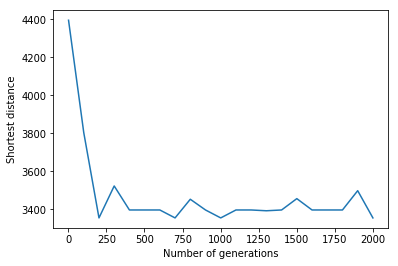

In [8]:
plt.plot(nb_generations, bests)
plt.xlabel("Number of generations")
plt.ylabel("Shortest distance")
plt.show()

### Testing the mutation rate

In [9]:
mutation_rates = np.arange(0, 0.05, 0.005)
bests = []
for mr in mutation_rates:
    for i in np.arange(10):
        ga = init_ga(1000, 1, mr, 80)
        ga.evolve(freq_stats=100)
        best_i = ga.bestIndividual()
        best_length = tour_length(spherical_distances, best_i)
    bests.append(np.mean(best_length))

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8144.66(8629.56)/5421.91(4934.20)/6787.22(6787.22)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [5632.00(4934.20)/5632.00(4934.20)/5632.00(4934.20)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [5632.00(4934.20)/5632.00(4934.20)/5632.00(4934.20)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [5632.00(4934.20)/5632.00(4934.20)/5632.00(4934.20)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [5632.00(4934.20)/5632.00(4934.20)/5632.00(4934.20)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [5632.00(4934.20)/5632.00(4934.20)/5632.00(4934.20)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [5632.00(4934.20)/5632.00(4934.20)/5632.00(4934.20)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [5632.00(4934.20)/5632.00(4934.20)/5632.00(4934.20)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [5632.00(4934.20)/5632.00(4934.20)/5632.00(4934.20)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [5632.00(4934.20)/5632.00(4934.20)/5632.00(4934.20)]
Gen. 1000 (100.00%): Max/Min/Avg 

Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [6016.00(4890.13)/6016.00(4890.13)/6016.00(4890.13)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [6016.00(4890.13)/6016.00(4890.13)/6016.00(4890.13)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [6016.00(4890.13)/6016.00(4890.13)/6016.00(4890.13)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [6016.00(4890.13)/6016.00(4890.13)/6016.00(4890.13)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [6016.00(4890.13)/6016.00(4890.13)/6016.00(4890.13)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [6016.00(4890.13)/6016.00(4890.13)/6016.00(4890.13)]
Total time elapsed: 5.861 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8271.27(8709.18)/5556.79(5132.41)/6892.72(6892.72)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [6144.00(5132.41)/6144.00(5132.41)/6144.00(5132.41)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [6144.00(5132.41)/6144.00(5132.41)/6144.00(5132.41)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [6144.00(5132.41)/6144.00(5132.41)/6144.00(5132.4

Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4098.12(4020.62)/3393.97(3396.36)/3415.10(3415.10)]
Total time elapsed: 7.303 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8181.12(8036.98)/5083.10(5266.46)/6817.60(6817.60)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4374.35(5770.27)/3623.15(3580.75)/3645.29(3645.29)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4393.82(6069.13)/3636.95(3580.75)/3661.52(3661.52)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4403.23(5980.11)/3641.22(3580.75)/3669.36(3669.36)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4399.57(5520.73)/3632.48(3580.75)/3666.31(3666.31)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4416.89(6003.17)/3649.05(3580.75)/3680.74(3680.74)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4361.37(5919.13)/3617.38(3580.75)/3634.48(3634.48)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4323.02(4352.35)/3581.60(3580.75)/3602.52(3602.52)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4331.37(5130.93)/3595.84(3580.75)/3609.47(3609.4

Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4347.21(7646.88)/3581.18(3392.19)/3622.68(3622.68)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4194.77(4999.92)/3447.56(3392.19)/3495.64(3495.64)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4209.57(4814.71)/3445.81(3392.19)/3507.98(3507.98)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4155.43(4826.08)/3426.95(3392.19)/3462.86(3462.86)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4310.25(5584.10)/3519.87(3392.19)/3591.88(3591.88)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4353.39(5814.61)/3549.64(3392.19)/3627.83(3627.83)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4295.19(6106.56)/3526.31(3392.19)/3579.32(3579.32)]
Total time elapsed: 7.984 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8083.33(8466.61)/5507.13(5157.50)/6736.11(6736.11)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4227.13(4975.31)/3490.37(3456.13)/3522.60(3522.60)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4287.08(5944.51)/3537.49(3456.13)/3572.56(3572.5

Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4317.40(5970.19)/3575.09(3522.84)/3597.83(3597.83)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4346.58(5970.19)/3591.51(3522.84)/3622.15(3622.15)]
Total time elapsed: 7.344 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8326.22(8883.13)/5780.86(5316.28)/6938.52(6938.52)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4558.48(5953.34)/3738.76(3628.66)/3798.73(3798.73)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4585.54(6076.01)/3755.99(3628.66)/3821.28(3821.28)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4605.65(6823.08)/3784.20(3628.66)/3838.04(3838.04)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4580.58(6117.04)/3754.58(3628.66)/3817.15(3817.15)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4687.23(6117.04)/3808.02(3628.66)/3906.02(3906.02)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4528.33(5903.40)/3722.24(3628.66)/3773.61(3773.61)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4605.89(5903.40)/3760.34(3628.66)/3838.24(3838.2

Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4201.81(5803.88)/3468.26(3392.19)/3501.51(3501.51)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4415.13(5791.55)/3579.26(3392.19)/3679.28(3679.28)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4256.91(5416.60)/3488.50(3392.19)/3547.42(3547.42)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4283.78(5719.93)/3510.83(3392.19)/3569.82(3569.82)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4311.63(5742.55)/3525.88(3392.19)/3593.02(3593.02)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4331.68(5486.69)/3526.06(3392.19)/3609.73(3609.73)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4235.56(5584.10)/3482.41(3392.19)/3529.64(3529.64)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4198.83(5584.10)/3463.17(3392.19)/3499.03(3499.03)]
Total time elapsed: 7.911 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8004.09(8269.83)/4716.79(4327.69)/6670.07(6670.07)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4381.33(6118.53)/3593.41(3456.13)/3651.11(3651.1

Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4197.62(5781.29)/3454.05(3354.52)/3498.02(3498.02)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4308.37(5842.90)/3515.14(3354.52)/3590.30(3590.30)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4362.39(5544.05)/3528.36(3354.52)/3635.32(3635.32)]
Total time elapsed: 7.618 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8221.03(8623.49)/5585.00(5213.18)/6850.86(6850.86)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4370.65(6671.87)/3582.10(3392.19)/3642.21(3642.21)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4403.47(5579.83)/3563.00(3392.19)/3669.56(3669.56)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4365.28(5930.48)/3559.82(3392.19)/3637.73(3637.73)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4351.07(5930.30)/3552.35(3392.19)/3625.89(3625.89)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4268.67(5719.93)/3502.94(3392.19)/3557.23(3557.23)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4379.11(5880.57)/3565.17(3392.19)/3649.26(3649.2

Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4525.65(6045.78)/3714.02(3598.43)/3771.37(3771.37)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4842.80(7150.84)/3922.38(3598.43)/4035.67(4035.67)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4624.15(7697.00)/3773.79(3456.13)/3853.46(3853.46)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4477.95(6076.68)/3643.95(3456.13)/3731.62(3731.62)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4484.80(5878.55)/3639.17(3456.13)/3737.33(3737.33)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4490.78(5730.87)/3634.60(3456.13)/3742.32(3742.32)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4386.82(6487.86)/3604.17(3456.13)/3655.68(3655.68)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4595.53(6524.46)/3723.46(3456.13)/3829.61(3829.61)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4511.05(5944.51)/3654.94(3456.13)/3759.21(3759.21)]
Total time elapsed: 8.240 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8039.27(8341.75)/5520.38(5254.22)/6699.39(6699.3

Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4603.53(6714.99)/3719.02(3396.36)/3836.27(3836.27)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4378.10(6390.25)/3581.34(3396.36)/3648.42(3648.42)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4314.81(5818.78)/3531.20(3396.36)/3595.67(3595.67)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4394.79(5721.05)/3567.70(3396.36)/3662.33(3662.33)]
Total time elapsed: 7.385 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8091.86(8375.09)/5224.75(4905.85)/6743.22(6743.22)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4424.90(5903.18)/3590.54(3396.36)/3687.41(3687.41)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4560.07(6222.19)/3673.39(3396.36)/3800.06(3800.06)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4509.33(5561.06)/3607.15(3396.36)/3757.77(3757.77)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4481.60(5721.05)/3607.45(3396.36)/3734.67(3734.67)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4626.34(6260.84)/3708.19(3396.36)/3855.28(3855.2

Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4403.05(6049.88)/3583.82(3392.19)/3669.21(3669.21)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4546.09(5742.55)/3634.78(3392.19)/3788.41(3788.41)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4464.30(5484.68)/3581.91(3392.19)/3720.25(3720.25)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4659.21(7073.05)/3763.29(3392.19)/3882.67(3882.67)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4557.04(6631.47)/3688.90(3392.19)/3797.53(3797.53)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4592.67(6695.22)/3711.12(3392.19)/3827.22(3827.22)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4452.89(6194.02)/3615.54(3392.19)/3710.74(3710.74)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4594.92(6258.20)/3691.35(3392.19)/3829.10(3829.10)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4513.89(6267.10)/3650.66(3392.19)/3761.58(3761.58)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4359.23(6633.73)/3574.47(3392.19)/3632.69(3632.69)]
Total time elapsed: 7.297 se

Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4689.61(6940.32)/3765.34(3354.52)/3908.01(3908.01)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4500.93(5821.76)/3607.24(3354.52)/3750.77(3750.77)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4458.49(6745.90)/3626.92(3354.52)/3715.41(3715.41)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4438.33(5629.26)/3566.77(3354.52)/3698.61(3698.61)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4524.19(6339.36)/3648.17(3354.52)/3770.16(3770.16)]
Total time elapsed: 7.323 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8038.88(8453.01)/5591.91(5249.69)/6699.06(6699.06)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4347.11(5753.88)/3531.46(3354.52)/3622.59(3622.59)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4400.24(5917.47)/3565.09(3354.52)/3666.87(3666.87)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4518.54(6995.11)/3669.63(3354.52)/3765.45(3765.45)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4560.18(5776.94)/3628.82(3354.52)/3800.15(3800.1

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8216.01(8464.48)/5625.49(5403.91)/6846.67(6846.67)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [5637.30(6761.41)/4512.35(4290.52)/4697.75(4697.75)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [5578.17(6752.54)/4490.31(4290.52)/4648.48(4648.48)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [5711.56(6507.29)/4504.11(4290.52)/4759.63(4759.63)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [5487.42(6712.94)/4452.20(4290.52)/4572.85(4572.85)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [5717.97(6884.48)/4551.65(4290.52)/4764.97(4764.97)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [5678.44(7690.17)/4571.11(4229.03)/4732.03(4732.03)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [5449.29(6502.77)/4396.61(4229.03)/4541.07(4541.07)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [5616.77(6628.39)/4463.59(4229.03)/4680.64(4680.64)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [5485.33(7428.25)/4461.65(4229.03)/4571.10(4571.10)]
Gen. 1000 (100.00%): Max/Min/Avg 

Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4623.45(5880.57)/3677.80(3392.19)/3852.88(3852.88)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4650.77(6302.31)/3721.22(3392.19)/3875.64(3875.64)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4692.61(6272.08)/3738.85(3392.19)/3910.51(3910.51)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4483.79(5780.62)/3610.62(3392.19)/3736.49(3736.49)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4611.83(6055.55)/3686.50(3392.19)/3843.19(3843.19)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4559.88(6538.48)/3686.75(3392.19)/3799.90(3799.90)]
Total time elapsed: 7.334 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8104.52(8320.80)/5074.88(4806.05)/6753.77(6753.77)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4616.37(7365.84)/3739.30(3354.52)/3846.98(3846.98)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4629.04(6931.60)/3731.29(3354.52)/3857.53(3857.53)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4521.81(6136.76)/3636.56(3354.52)/3768.18(3768.1

Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4965.41(6689.45)/3928.96(3493.79)/4137.84(4137.84)]
Total time elapsed: 7.520 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8064.40(8788.22)/5849.60(5380.68)/6720.33(6720.33)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4777.35(6258.87)/3775.25(3392.19)/3981.12(3981.12)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4609.46(5880.57)/3672.06(3392.19)/3841.21(3841.21)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4654.31(5784.94)/3680.67(3392.19)/3878.59(3878.59)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4621.01(6438.98)/3714.35(3392.19)/3850.84(3850.84)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4764.03(6690.42)/3801.37(3392.19)/3970.02(3970.02)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4733.72(6604.79)/3780.88(3392.19)/3944.77(3944.77)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4568.35(6218.51)/3676.01(3392.19)/3806.96(3806.96)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4625.89(6596.04)/3724.76(3392.19)/3854.91(3854.9

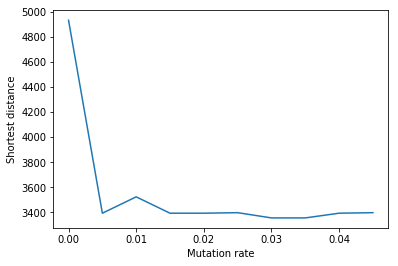

In [10]:
plt.plot(mutation_rates, bests)
plt.xlabel("Mutation rate")
plt.ylabel("Shortest distance")
plt.show()

### Testing the population size

In [11]:
population_sizes = np.arange(50, 201, 20)
bests = []
for ps in population_sizes:
    for i in np.arange(10):
        ga = init_ga(1000, 1, 0.02, ps)
        ga.evolve(freq_stats=100)
        best_i = ga.bestIndividual()
        best_length = tour_length(spherical_distances, best_i)
    bests.append(np.mean(best_length))

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7904.14(8285.49)/4627.21(4059.95)/6586.79(6586.79)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4553.79(6070.55)/3661.94(3396.36)/3794.83(3794.83)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4382.05(6904.54)/3594.37(3396.36)/3651.70(3651.70)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4331.16(6197.24)/3549.90(3396.36)/3609.30(3609.30)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4266.00(5561.06)/3498.78(3396.36)/3555.00(3555.00)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4259.37(6129.17)/3507.34(3396.36)/3549.48(3549.48)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4433.70(6711.54)/3621.66(3396.36)/3694.75(3694.75)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4399.69(5843.71)/3575.46(3396.36)/3666.41(3666.41)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4265.11(4735.38)/3459.23(3396.36)/3554.25(3554.25)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4280.23(5431.65)/3501.64(3396.36)/3566.86(3566.86)]
Gen. 1000 (100.00%): Max/Min/Avg 

Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4597.04(6294.21)/3694.43(3392.19)/3830.87(3830.87)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4418.78(5607.39)/3571.32(3392.19)/3682.31(3682.31)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4265.01(5607.39)/3498.10(3392.19)/3554.18(3554.18)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4361.36(5484.68)/3539.28(3392.19)/3634.47(3634.47)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4194.81(5584.10)/3461.03(3392.19)/3495.67(3495.67)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4322.71(6647.83)/3552.57(3392.19)/3602.26(3602.26)]
Total time elapsed: 4.664 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8011.92(8115.87)/4953.49(4819.34)/6676.60(6676.60)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4644.44(5244.81)/3765.98(3685.02)/3870.36(3870.36)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4689.72(6173.40)/3831.13(3685.02)/3908.10(3908.10)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4811.42(6173.40)/3889.27(3685.02)/4009.52(4009.5

Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4423.59(5880.57)/3587.49(3392.19)/3686.32(3686.32)]
Total time elapsed: 6.255 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8031.44(8326.81)/5492.42(5227.53)/6692.87(6692.87)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4539.83(5868.27)/3704.07(3565.15)/3783.20(3783.20)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4540.71(6065.19)/3711.35(3565.15)/3783.93(3783.93)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4580.03(7233.18)/3760.49(3565.15)/3816.69(3816.69)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4601.26(5674.51)/3722.18(3565.15)/3834.38(3834.38)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4449.22(5118.27)/3632.75(3565.15)/3707.68(3707.68)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4609.19(6093.45)/3746.92(3565.15)/3840.99(3840.99)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4500.55(5778.73)/3681.93(3565.15)/3750.46(3750.46)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4553.98(6055.67)/3717.82(3565.15)/3794.99(3794.9

Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4293.53(5431.65)/3507.84(3396.36)/3577.94(3577.94)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4318.87(5648.39)/3527.86(3396.36)/3599.05(3599.05)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4345.51(5818.78)/3547.14(3396.36)/3621.26(3621.26)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4353.11(5843.71)/3551.89(3396.36)/3627.59(3627.59)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4320.77(7292.10)/3560.79(3396.36)/3600.64(3600.64)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4371.81(5884.74)/3562.95(3396.36)/3643.18(3643.18)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4336.26(7436.10)/3572.49(3396.36)/3613.55(3613.55)]
Total time elapsed: 7.825 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8122.87(8605.51)/5745.16(5380.13)/6769.06(6769.06)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4633.66(6702.03)/3785.09(3580.75)/3861.38(3861.38)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4709.98(6003.17)/3794.95(3580.75)/3924.98(3924.9

Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4334.68(5884.74)/3543.61(3396.36)/3612.23(3612.23)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4417.41(7194.69)/3621.49(3396.36)/3681.17(3681.17)]
Total time elapsed: 7.794 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8164.66(8334.23)/5500.46(5338.03)/6803.88(6803.88)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [5317.19(7290.10)/4371.48(4238.99)/4431.00(4431.00)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4329.63(5679.21)/3519.70(3354.52)/3608.02(3608.02)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4285.04(5772.66)/3500.69(3354.52)/3570.87(3570.87)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4319.63(6271.84)/3533.64(3354.52)/3599.69(3599.69)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4291.28(6973.11)/3529.42(3354.52)/3576.07(3576.07)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4324.31(5801.87)/3521.93(3354.52)/3603.59(3603.59)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4397.95(6314.39)/3579.07(3354.52)/3664.96(3664.9

Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4369.68(5753.44)/3596.03(3509.84)/3641.40(3641.40)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4382.06(5272.94)/3587.81(3509.84)/3651.72(3651.72)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4453.13(7265.35)/3668.95(3509.84)/3710.94(3710.94)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4541.81(6047.24)/3692.83(3509.84)/3784.84(3784.84)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4427.54(6272.79)/3638.26(3509.84)/3689.62(3689.62)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4445.14(5784.04)/3635.02(3509.84)/3704.28(3704.28)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4598.11(6923.11)/3751.96(3509.84)/3831.76(3831.76)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4410.41(5998.22)/3622.97(3509.84)/3675.34(3675.34)]
Total time elapsed: 9.443 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8074.45(8449.37)/5561.85(5236.77)/6728.70(6728.70)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4568.31(6251.78)/3718.45(3522.84)/3806.93(3806.9

Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4402.44(6164.62)/3587.41(3392.19)/3668.70(3668.70)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4566.20(6315.75)/3679.98(3392.19)/3805.16(3805.16)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4345.30(6020.78)/3552.00(3392.19)/3621.08(3621.08)]
Total time elapsed: 11.103 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8098.05(8383.87)/5123.00(4778.80)/6748.38(6748.38)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4636.95(6020.84)/3768.91(3598.43)/3864.12(3864.12)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4596.96(6484.19)/3763.70(3598.43)/3830.80(3830.80)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4592.23(6539.59)/3762.41(3598.43)/3826.86(3826.86)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4533.95(6020.84)/3717.68(3598.43)/3778.29(3778.29)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4567.64(6086.81)/3736.95(3598.43)/3806.37(3806.37)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4588.74(6045.78)/3746.32(3598.43)/3823.95(3823.

Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4456.27(5427.30)/3643.41(3551.68)/3713.56(3713.56)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4456.31(5943.11)/3659.65(3551.68)/3713.59(3713.59)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4507.76(5824.60)/3682.07(3551.68)/3756.46(3756.46)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4355.99(5884.74)/3554.76(3396.36)/3629.99(3629.99)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4397.90(5884.74)/3576.24(3396.36)/3664.92(3664.92)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4329.52(5771.70)/3537.38(3396.36)/3607.94(3607.94)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4310.41(5884.74)/3530.71(3396.36)/3592.01(3592.01)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4456.50(5884.74)/3605.16(3396.36)/3713.75(3713.75)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4414.08(6479.01)/3604.31(3396.36)/3678.40(3678.40)]
Total time elapsed: 12.587 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8113.51(8868.64)/5589.62(4935.35)/6761.26(6761.

Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4400.98(6230.34)/3589.89(3396.36)/3667.49(3667.49)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4456.64(5721.05)/3596.37(3396.36)/3713.86(3713.86)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4367.78(5884.74)/3560.87(3396.36)/3639.82(3639.82)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4365.58(6253.43)/3570.77(3396.36)/3637.99(3637.99)]
Total time elapsed: 12.705 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8205.65(8314.66)/5078.53(4938.28)/6838.04(6838.04)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [5236.73(6390.67)/4311.61(4242.43)/4363.94(4363.94)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4452.76(5982.17)/3639.79(3493.79)/3710.63(3710.63)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4505.40(5982.17)/3666.62(3493.79)/3754.50(3754.50)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4485.10(7454.57)/3688.56(3493.79)/3737.58(3737.58)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4426.90(6111.71)/3629.60(3493.79)/3689.08(3689.

Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4391.52(5874.75)/3572.62(3396.36)/3659.60(3659.60)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4325.06(6240.52)/3547.38(3396.36)/3604.22(3604.22)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4278.79(6769.22)/3527.97(3396.36)/3565.66(3565.66)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4374.69(6440.54)/3580.56(3396.36)/3645.57(3645.57)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4400.77(5946.17)/3580.10(3396.36)/3667.31(3667.31)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4289.09(5671.10)/3513.60(3396.36)/3574.24(3574.24)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4397.73(6136.49)/3585.18(3396.36)/3664.78(3664.78)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4412.56(5818.78)/3580.72(3396.36)/3677.13(3677.13)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4408.43(5884.74)/3581.54(3396.36)/3673.69(3673.69)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4287.64(5590.32)/3510.45(3396.36)/3573.04(3573.04)]
Total time elapsed: 15.284 s

Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4289.71(6221.10)/3525.43(3392.19)/3574.76(3574.76)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4376.76(7511.10)/3599.14(3392.19)/3647.30(3647.30)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4395.40(5880.57)/3573.43(3392.19)/3662.83(3662.83)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4368.68(6147.63)/3568.43(3392.19)/3640.57(3640.57)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4353.75(5880.57)/3552.12(3392.19)/3628.12(3628.12)]
Total time elapsed: 17.080 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8087.27(8969.85)/5492.07(4675.33)/6739.39(6739.39)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4594.14(7668.96)/3799.85(3685.02)/3828.45(3828.45)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4673.13(7180.72)/3844.68(3685.02)/3894.27(3894.27)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4680.05(6883.58)/3843.83(3685.02)/3900.04(3900.04)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4621.84(6084.38)/3794.09(3685.02)/3851.53(3851.

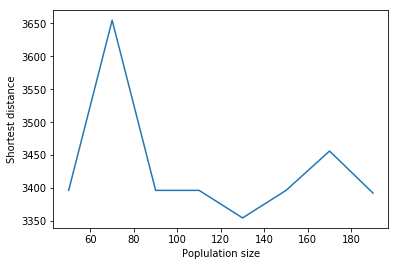

In [12]:
plt.plot(population_sizes, bests)
plt.xlabel("Poplulation size")
plt.ylabel("Shortest distance")
plt.show()

### Testing crossover rate

In [13]:
crossover_rates = np.arange(0.1, 1.1, 0.1)
bests = []
for cr in crossover_rates:
    for i in np.arange(20):
        ga = init_ga(1000, cr, 0.02, 80)
        ga.evolve(freq_stats=100)
        best_i = ga.bestIndividual()
        best_length = tour_length(spherical_distances, best_i)
    bests.append(np.mean(best_length))

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8058.59(8477.01)/5540.21(5174.07)/6715.49(6715.49)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4387.74(5801.87)/3553.53(3354.52)/3656.45(3656.45)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4389.47(5801.87)/3554.37(3354.52)/3657.89(3657.89)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4286.58(5442.49)/3489.02(3354.52)/3572.15(3572.15)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4190.32(5679.21)/3448.06(3354.52)/3491.93(3491.93)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4395.85(5598.12)/3546.33(3354.52)/3663.21(3663.21)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4232.51(5842.90)/3474.52(3354.52)/3527.09(3527.09)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4284.17(5753.88)/3499.64(3354.52)/3570.14(3570.14)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4401.17(6610.38)/3589.59(3354.52)/3667.64(3667.64)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4225.99(6269.02)/3478.81(3354.52)/3521.66(3521.66)]
Gen. 1000 (100.00%): Max/Min/Avg 

Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4220.07(5109.82)/3461.74(3392.19)/3516.72(3516.72)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4425.16(5824.67)/3585.67(3392.19)/3687.63(3687.63)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4326.09(5719.93)/3532.50(3392.19)/3605.08(3605.08)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4327.73(5791.55)/3535.72(3392.19)/3606.44(3606.44)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4383.61(6262.94)/3579.99(3392.19)/3653.01(3653.01)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4345.37(5814.61)/3545.55(3392.19)/3621.14(3621.14)]
Total time elapsed: 5.242 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8136.71(8025.76)/5030.75(5173.92)/6780.59(6780.59)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4921.27(5413.04)/4036.88(3998.39)/4101.06(4101.06)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [5032.23(5644.09)/4080.70(3998.39)/4193.53(4193.53)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [5158.59(6420.81)/4177.10(3998.39)/4298.82(4298.8

Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4417.83(7350.28)/3623.45(3392.19)/3681.52(3681.52)]
Total time elapsed: 5.341 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8199.81(8439.86)/5276.34(5002.89)/6833.18(6833.18)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4398.10(5892.98)/3562.91(3354.52)/3665.09(3665.09)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4372.12(6295.68)/3564.06(3354.52)/3643.43(3643.43)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4381.54(6238.99)/3567.53(3354.52)/3651.28(3651.28)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4202.76(5776.94)/3456.79(3354.52)/3502.30(3502.30)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4340.65(5842.90)/3531.82(3354.52)/3617.20(3617.20)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4276.89(6138.64)/3506.06(3354.52)/3564.07(3564.07)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4207.78(5753.88)/3459.07(3354.52)/3506.49(3506.49)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4275.14(5475.16)/3485.09(3354.52)/3562.62(3562.6

Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4466.83(5319.86)/3656.37(3580.75)/3722.36(3722.36)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4264.51(5544.05)/3482.61(3354.52)/3553.76(3553.76)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4314.40(5753.88)/3515.11(3354.52)/3595.33(3595.33)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4352.51(5842.90)/3537.86(3354.52)/3627.09(3627.09)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4368.01(5842.90)/3545.66(3354.52)/3640.01(3640.01)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4471.15(6219.16)/3614.94(3354.52)/3725.96(3725.96)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4368.92(5598.12)/3534.28(3354.52)/3640.77(3640.77)]
Total time elapsed: 5.412 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8243.47(8162.76)/5291.91(5384.59)/6869.56(6869.56)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4233.21(5689.56)/3471.16(3354.52)/3527.67(3527.67)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4278.86(5710.80)/3495.50(3354.52)/3565.71(3565.7

Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4426.60(5872.33)/3590.01(3396.36)/3688.83(3688.83)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4378.59(5721.05)/3559.92(3396.36)/3648.82(3648.82)]
Total time elapsed: 5.674 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8004.44(8181.21)/5297.46(5115.55)/6670.37(6670.37)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4346.80(5880.57)/3548.50(3392.19)/3622.33(3622.33)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4276.33(5814.61)/3509.33(3392.19)/3563.60(3563.60)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4254.03(5958.67)/3500.13(3392.19)/3545.02(3545.02)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4433.30(6800.12)/3622.51(3392.19)/3694.41(3694.41)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4429.98(7036.17)/3625.54(3392.19)/3691.65(3691.65)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4438.16(6401.28)/3614.64(3392.19)/3698.46(3698.46)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4438.70(6643.46)/3621.85(3392.19)/3698.92(3698.9

Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4256.89(5561.06)/3494.19(3396.36)/3547.41(3547.41)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4264.63(5795.72)/3503.93(3396.36)/3553.86(3553.86)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4312.01(6201.12)/3539.06(3396.36)/3593.34(3593.34)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4309.40(5602.25)/3521.60(3396.36)/3591.17(3591.17)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4386.15(6201.84)/3580.85(3396.36)/3655.13(3655.13)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4237.00(5197.97)/3473.87(3396.36)/3530.83(3530.83)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4520.04(5818.78)/3630.75(3396.36)/3766.70(3766.70)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4502.63(6676.03)/3660.86(3396.36)/3752.19(3752.19)]
Total time elapsed: 5.913 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7915.54(8052.17)/5015.95(4852.29)/6596.29(6596.29)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4392.11(5843.71)/3571.68(3396.36)/3660.10(3660.1

Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4365.11(6509.00)/3576.47(3396.36)/3637.59(3637.59)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4409.26(7374.05)/3619.16(3396.36)/3674.38(3674.38)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4287.79(5765.97)/3515.54(3396.36)/3573.16(3573.16)]
Total time elapsed: 5.697 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8081.22(8143.36)/5440.12(5380.41)/6734.35(6734.35)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4613.14(5970.19)/3728.03(3522.84)/3844.29(3844.29)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4455.50(6011.22)/3651.50(3522.84)/3712.91(3712.91)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4519.40(5712.36)/3671.99(3522.84)/3766.16(3766.16)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4483.97(7040.30)/3688.28(3522.84)/3736.64(3736.64)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4373.93(5847.52)/3604.53(3522.84)/3644.95(3644.95)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4457.36(5847.52)/3647.73(3522.84)/3714.46(3714.4

Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4501.36(6967.96)/3668.40(3396.36)/3751.14(3751.14)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4496.36(5561.06)/3602.14(3396.36)/3746.97(3746.97)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4488.84(7031.75)/3662.42(3396.36)/3740.70(3740.70)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4521.10(6054.97)/3645.29(3396.36)/3767.58(3767.58)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4427.83(6297.10)/3606.79(3396.36)/3689.86(3689.86)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4450.02(6284.52)/3618.53(3396.36)/3708.35(3708.35)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4440.73(5884.74)/3597.51(3396.36)/3700.61(3700.61)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4358.14(6413.42)/3570.31(3396.36)/3631.78(3631.78)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4281.51(5721.05)/3511.06(3396.36)/3567.92(3567.92)]
Total time elapsed: 5.647 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8126.88(8516.47)/5364.47(4959.50)/6772.40(6772.4

Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4325.02(5753.88)/3520.47(3354.52)/3604.18(3604.18)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4301.40(6099.11)/3518.93(3354.52)/3584.50(3584.50)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4446.63(6074.91)/3595.73(3354.52)/3705.52(3705.52)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4384.58(5629.26)/3543.10(3354.52)/3653.81(3653.81)]
Total time elapsed: 5.692 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8219.29(8102.01)/4666.18(4853.09)/6849.41(6849.41)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4355.50(5880.57)/3553.02(3392.19)/3629.58(3629.58)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4409.45(6307.81)/3595.74(3392.19)/3674.55(3674.55)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4511.46(7175.60)/3678.69(3392.19)/3759.55(3759.55)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4385.23(5814.61)/3565.66(3392.19)/3654.35(3654.35)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4315.82(5742.55)/3528.03(3392.19)/3596.51(3596.5

Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4592.90(6060.77)/3755.37(3617.20)/3827.42(3827.42)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4419.66(5753.88)/3566.19(3354.52)/3683.05(3683.05)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4367.77(5477.29)/3526.79(3354.52)/3639.81(3639.81)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4365.09(5801.87)/3542.43(3354.52)/3637.57(3637.57)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4353.21(6610.81)/3561.24(3354.52)/3627.67(3627.67)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4258.67(5475.16)/3477.27(3354.52)/3548.89(3548.89)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4263.34(5801.87)/3490.15(3354.52)/3552.78(3552.78)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4309.53(6411.77)/3530.98(3354.52)/3591.27(3591.27)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4253.60(6417.66)/3497.75(3354.52)/3544.66(3544.66)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4356.72(5629.26)/3530.30(3354.52)/3630.60(3630.60)]
Total time elapsed: 5.990 se

Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4397.31(6144.53)/3572.85(3354.52)/3664.43(3664.43)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4266.73(5294.50)/3473.37(3354.52)/3555.61(3555.61)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4298.77(5679.21)/3504.48(3354.52)/3582.30(3582.30)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4297.91(5679.21)/3504.05(3354.52)/3581.60(3581.60)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4378.66(6291.31)/3567.59(3354.52)/3648.88(3648.88)]
Total time elapsed: 6.040 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8108.28(8167.62)/5274.64(5209.55)/6756.90(6756.90)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4313.25(5818.78)/3530.38(3396.36)/3594.38(3594.38)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4376.13(5843.71)/3563.64(3396.36)/3646.77(3646.77)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4279.69(5884.74)/3514.09(3396.36)/3566.41(3566.41)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4337.40(5818.78)/3542.96(3396.36)/3614.50(3614.5

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7988.07(8286.13)/5337.56(5042.23)/6656.73(6656.73)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4668.80(5923.11)/3778.78(3598.43)/3890.66(3890.66)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4602.52(5927.97)/3696.39(3456.13)/3835.43(3835.43)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4453.34(6288.98)/3637.70(3456.13)/3711.12(3711.12)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4304.38(6585.49)/3555.68(3456.13)/3586.98(3586.98)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4390.89(5903.48)/3592.90(3456.13)/3659.07(3659.07)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4515.64(6074.05)/3663.09(3456.13)/3763.03(3763.03)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4479.26(5903.48)/3637.59(3456.13)/3732.71(3732.71)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4481.30(5944.51)/3640.37(3456.13)/3734.42(3734.42)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4496.21(5992.50)/3649.83(3456.13)/3746.84(3746.84)]
Gen. 1000 (100.00%): Max/Min/Avg 

Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4512.65(5875.25)/3684.77(3547.51)/3760.54(3760.54)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4476.81(6008.74)/3670.68(3547.51)/3730.68(3730.68)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4583.51(6088.84)/3728.00(3547.51)/3819.59(3819.59)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4555.15(5700.33)/3696.91(3547.51)/3795.96(3795.96)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4691.01(6669.52)/3806.74(3547.51)/3909.18(3909.18)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4598.31(5590.91)/3708.00(3547.51)/3831.92(3831.92)]
Total time elapsed: 6.085 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8007.03(8637.84)/5605.20(5100.69)/6672.52(6672.52)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4424.24(6378.51)/3623.65(3456.13)/3686.86(3686.86)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4481.72(5780.82)/3633.05(3456.13)/3734.77(3734.77)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4269.96(5551.22)/3521.82(3456.13)/3558.30(3558.3

Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4646.28(5842.90)/3668.63(3354.52)/3871.90(3871.90)]
Total time elapsed: 6.161 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8014.86(8204.34)/5072.05(4844.10)/6679.05(6679.05)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4302.14(5843.71)/3525.20(3396.36)/3585.12(3585.12)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4366.18(5671.10)/3551.80(3396.36)/3638.48(3638.48)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4361.63(5585.62)/3545.89(3396.36)/3634.69(3634.69)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4621.98(6632.41)/3725.52(3396.36)/3851.65(3851.65)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4360.05(5872.27)/3556.45(3396.36)/3633.38(3633.38)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4532.82(6172.24)/3657.17(3396.36)/3777.35(3777.35)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4372.76(6769.22)/3586.23(3396.36)/3643.97(3643.97)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4319.14(5671.10)/3528.78(3396.36)/3599.28(3599.2

Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4397.96(5986.53)/3580.16(3396.36)/3664.96(3664.96)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4253.89(6313.58)/3506.87(3396.36)/3544.91(3544.91)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4398.71(5561.06)/3561.46(3396.36)/3665.59(3665.59)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4294.14(6472.81)/3533.43(3396.36)/3578.45(3578.45)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4387.85(5671.10)/3562.09(3396.36)/3656.54(3656.54)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4274.33(5347.19)/3495.87(3396.36)/3561.94(3561.94)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4462.99(5843.71)/3606.14(3396.36)/3719.15(3719.15)]
Total time elapsed: 6.379 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8179.42(8708.27)/5449.86(4919.82)/6816.19(6816.19)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4413.84(6314.26)/3616.22(3456.13)/3678.20(3678.20)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4369.43(5699.72)/3575.72(3456.13)/3641.19(3641.1

Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4556.01(5739.97)/3726.54(3617.20)/3796.67(3796.67)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4285.84(5753.88)/3500.50(3354.52)/3571.53(3571.53)]
Total time elapsed: 6.382 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7928.47(7966.72)/4780.51(4727.65)/6607.06(6607.06)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4392.10(7449.81)/3608.33(3392.19)/3660.08(3660.08)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4468.41(6230.27)/3625.19(3392.19)/3723.68(3723.68)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4319.68(5742.55)/3530.00(3392.19)/3599.73(3599.73)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4281.33(5357.56)/3497.77(3392.19)/3567.78(3567.78)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4443.72(6411.21)/3618.07(3392.19)/3703.10(3703.10)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4232.38(5210.23)/3470.50(3392.19)/3526.99(3526.99)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4299.27(5975.00)/3525.65(3392.19)/3582.72(3582.7

Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4645.00(6442.40)/3797.93(3628.66)/3870.83(3870.83)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4705.48(6028.02)/3812.32(3628.66)/3921.23(3921.23)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4754.70(6051.08)/3835.69(3628.66)/3962.25(3962.25)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4593.96(6076.01)/3760.29(3628.66)/3828.30(3828.30)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4636.13(7616.26)/3815.10(3628.66)/3863.44(3863.44)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4678.97(6051.08)/3801.12(3628.66)/3899.14(3899.14)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4574.38(6076.01)/3750.25(3628.66)/3811.98(3811.98)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4511.48(5953.34)/3714.70(3628.66)/3759.56(3759.56)]
Total time elapsed: 6.350 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8283.42(8557.88)/5704.85(5466.68)/6902.85(6902.85)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4378.15(5758.89)/3546.83(3354.52)/3648.46(3648.4

Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4516.48(5772.71)/3664.15(3497.97)/3763.73(3763.73)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4509.74(6052.78)/3672.90(3497.97)/3758.11(3758.11)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4382.41(5387.69)/3587.19(3497.97)/3652.01(3652.01)]
Total time elapsed: 6.674 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8100.98(8274.24)/5367.59(5190.09)/6750.82(6750.82)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4762.56(6157.69)/3875.08(3710.34)/3968.80(3968.80)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4634.28(6157.69)/3810.91(3710.34)/3861.90(3861.90)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4751.65(6730.67)/3888.44(3710.34)/3959.70(3959.70)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4251.74(5679.21)/3480.56(3354.52)/3543.12(3543.12)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4162.13(5311.31)/3425.56(3354.52)/3468.44(3468.44)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4425.63(5842.90)/3573.87(3354.52)/3688.02(3688.0

Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4251.13(5734.45)/3481.81(3354.52)/3542.60(3542.60)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4258.61(5776.94)/3486.94(3354.52)/3548.84(3548.84)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4250.24(5895.48)/3485.48(3354.52)/3541.86(3541.86)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4376.42(6452.90)/3570.98(3354.52)/3647.01(3647.01)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4365.54(5702.52)/3538.07(3354.52)/3637.95(3637.95)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4275.20(5477.29)/3485.21(3354.52)/3562.67(3562.67)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4287.12(5776.94)/3501.91(3354.52)/3572.60(3572.60)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4282.30(5842.90)/3501.41(3354.52)/3568.59(3568.59)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4135.35(5224.70)/3410.63(3354.52)/3446.12(3446.12)]
Total time elapsed: 6.839 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7971.52(8394.18)/5081.96(4585.38)/6642.93(6642.9

Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4403.93(5903.48)/3599.68(3456.13)/3669.94(3669.94)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4381.30(5412.91)/3570.28(3456.13)/3651.08(3651.08)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4527.43(6160.49)/3672.76(3456.13)/3772.86(3772.86)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4411.33(5944.51)/3604.81(3456.13)/3676.11(3676.11)]
Total time elapsed: 6.908 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8188.91(8545.30)/5358.12(4975.31)/6824.09(6824.09)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4448.26(6369.12)/3619.25(3392.19)/3706.89(3706.89)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4391.19(5761.52)/3566.32(3392.19)/3659.33(3659.33)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4352.21(6445.40)/3566.46(3392.19)/3626.85(3626.85)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4341.73(5791.55)/3542.89(3392.19)/3618.11(3618.11)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4362.86(6878.67)/3581.11(3392.19)/3635.71(3635.7

Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4578.44(5825.67)/3756.03(3659.04)/3815.37(3815.37)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4600.74(6147.42)/3775.98(3659.04)/3833.95(3833.95)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4617.65(6058.40)/3782.23(3659.04)/3848.04(3848.04)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4690.98(6147.42)/3821.79(3659.04)/3909.15(3909.15)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4665.44(6147.42)/3809.12(3659.04)/3887.86(3887.86)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4394.15(5843.71)/3572.70(3396.36)/3661.79(3661.79)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4371.28(6377.69)/3577.11(3396.36)/3642.73(3642.73)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4481.51(7351.80)/3664.75(3396.36)/3734.59(3734.59)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4416.63(5721.05)/3578.02(3396.36)/3680.52(3680.52)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4355.29(5721.05)/3548.53(3396.36)/3629.41(3629.41)]
Total time elapsed: 7.326 se

Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4283.43(5801.87)/3500.77(3354.52)/3569.52(3569.52)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4452.79(6543.53)/3617.36(3354.52)/3710.66(3710.66)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4242.89(5378.94)/3466.22(3354.52)/3535.75(3535.75)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4354.52(6785.92)/3565.72(3354.52)/3628.76(3628.76)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4258.25(5396.13)/3474.01(3354.52)/3548.54(3548.54)]
Total time elapsed: 10.386 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7866.73(7944.52)/4643.41(4529.94)/6555.60(6555.60)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4652.98(6447.05)/3779.15(3551.68)/3877.48(3877.48)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4499.49(5824.60)/3678.06(3551.68)/3749.57(3749.57)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4257.21(6339.04)/3509.21(3396.36)/3547.67(3547.67)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4459.73(6341.28)/3625.81(3396.36)/3716.45(3716.

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8107.78(8667.64)/5637.69(5174.16)/6756.48(6756.48)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [5395.74(7110.71)/4448.12(4355.96)/4496.45(4496.45)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [5402.07(6844.34)/4445.70(4355.96)/4501.73(4501.73)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [5385.03(7540.29)/4419.32(4255.55)/4487.53(4487.53)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4642.63(5679.93)/3733.35(3551.68)/3868.86(3868.86)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4453.40(5716.38)/3652.14(3551.68)/3711.17(3711.17)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4784.78(7473.85)/3887.68(3551.68)/3987.32(3987.32)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4535.35(6286.10)/3710.77(3551.68)/3779.46(3779.46)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4497.49(5600.89)/3668.53(3551.68)/3747.91(3747.91)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4687.12(6346.70)/3792.56(3551.68)/3905.94(3905.94)]
Gen. 1000 (100.00%): Max/Min/Avg 

Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4664.39(6535.81)/3802.30(3598.43)/3886.99(3886.99)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4664.10(5842.02)/3772.12(3598.43)/3886.75(3886.75)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4626.04(6086.81)/3766.39(3598.43)/3855.04(3855.04)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4607.24(6086.81)/3757.04(3598.43)/3839.36(3839.36)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4724.28(6317.01)/3824.92(3598.43)/3936.90(3936.90)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4518.67(6646.39)/3721.87(3598.43)/3765.56(3765.56)]
Total time elapsed: 6.835 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7978.95(8335.03)/5659.37(5394.35)/6649.13(6649.13)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4275.35(6411.21)/3520.11(3392.19)/3562.79(3562.79)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4442.05(5880.57)/3596.54(3392.19)/3701.71(3701.71)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4435.64(5827.11)/3590.83(3392.19)/3696.37(3696.3

Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4269.47(5784.30)/3506.27(3396.36)/3557.89(3557.89)]
Total time elapsed: 6.860 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7906.60(8219.83)/5052.42(4687.22)/6588.84(6588.84)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4579.56(6162.43)/3739.67(3580.75)/3816.30(3816.30)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4307.19(6086.31)/3532.65(3392.19)/3589.33(3589.33)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4483.31(6313.38)/3636.39(3392.19)/3736.09(3736.09)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4239.99(5873.90)/3490.71(3392.19)/3533.32(3533.32)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4311.17(6244.36)/3538.32(3392.19)/3592.64(3592.64)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4466.27(6840.76)/3643.20(3392.19)/3721.89(3721.89)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4351.71(6902.68)/3574.57(3392.19)/3626.43(3626.43)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4355.47(6217.29)/3562.97(3392.19)/3629.56(3629.5

Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4598.51(6282.93)/3714.52(3456.13)/3832.09(3832.09)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4450.60(6757.20)/3647.34(3456.13)/3708.83(3708.83)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4455.61(5903.48)/3625.92(3456.13)/3713.01(3713.01)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4425.72(6315.86)/3622.99(3456.13)/3688.10(3688.10)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4476.67(5855.49)/3634.20(3456.13)/3730.56(3730.56)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4380.97(6179.96)/3594.61(3456.13)/3650.81(3650.81)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4361.78(5944.51)/3578.58(3456.13)/3634.82(3634.82)]
Total time elapsed: 7.030 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8191.58(8175.25)/4957.29(4979.65)/6826.32(6826.32)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4463.92(6524.98)/3633.00(3392.19)/3719.93(3719.93)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4322.84(5815.99)/3533.96(3392.19)/3602.37(3602.3

Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4386.50(5598.12)/3542.18(3354.52)/3655.41(3655.41)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4260.27(5477.29)/3478.12(3354.52)/3550.22(3550.22)]
Total time elapsed: 7.945 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8064.11(8324.38)/4907.75(4556.78)/6720.09(6720.09)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4634.81(6124.47)/3785.08(3636.09)/3862.34(3862.34)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4688.92(6229.78)/3816.13(3636.09)/3907.44(3907.44)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4704.14(6124.47)/3819.10(3636.09)/3920.12(3920.12)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4674.08(5986.45)/3798.60(3636.09)/3895.07(3895.07)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4658.75(5876.52)/3786.43(3636.09)/3882.29(3882.29)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4599.36(6035.45)/3764.34(3636.09)/3832.80(3832.80)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4681.00(6663.36)/3826.07(3636.09)/3900.83(3900.8

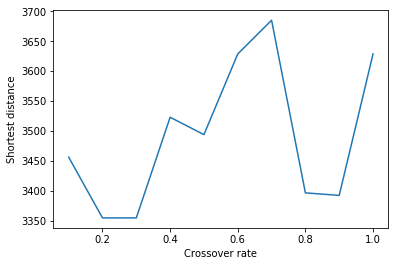

In [14]:
plt.plot(crossover_rates, bests)
plt.xlabel("Crossover rate")
plt.ylabel("Shortest distance")
plt.show()

### Testing the selection method

In [17]:
best_length = []
for i in np.arange(30):
    ga = init_ga(1000, 0.8, 0.02, 80)
    ga.selector.set(Selectors.GRankSelector)
    ga.evolve(freq_stats=100)
    best = ga.bestIndividual()
    best_length.append(tour_length(spherical_distances, best)) 
print np.mean(best_length)

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8164.28(8816.52)/5764.49(5266.42)/6803.57(6803.57)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4350.29(5645.65)/3564.56(3456.13)/3625.24(3625.24)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4461.20(6432.25)/3646.03(3456.13)/3717.66(3717.66)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4562.98(5878.55)/3675.61(3456.13)/3802.48(3802.48)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4329.48(5855.49)/3559.17(3456.13)/3607.90(3607.90)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4447.48(6814.13)/3646.58(3456.13)/3706.24(3706.24)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4372.42(6199.74)/3590.21(3456.13)/3643.68(3643.68)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4287.99(5245.03)/3523.22(3456.13)/3573.33(3573.33)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4337.87(5730.87)/3560.65(3456.13)/3614.89(3614.89)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4345.29(6437.33)/3578.66(3456.13)/3621.08(3621.08)]
Gen. 1000 (100.00%): Max/Min/Avg 

Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4553.17(5959.42)/3694.61(3509.84)/3794.31(3794.31)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4256.51(6277.83)/3497.06(3354.52)/3547.09(3547.09)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4322.34(6029.21)/3528.52(3354.52)/3601.95(3601.95)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4353.37(6002.47)/3544.31(3354.52)/3627.81(3627.81)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4313.89(5776.94)/3515.70(3354.52)/3594.91(3594.91)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4190.10(5842.90)/3450.99(3354.52)/3491.75(3491.75)]
Total time elapsed: 6.772 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8121.56(8338.18)/5185.45(4932.19)/6767.97(6767.97)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4559.37(5880.57)/3650.76(3392.19)/3799.47(3799.47)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4604.63(7381.98)/3740.85(3392.19)/3837.19(3837.19)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4381.28(6177.26)/3576.24(3392.19)/3651.07(3651.0

Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4554.97(6847.90)/3711.32(3456.13)/3795.81(3795.81)]
Total time elapsed: 6.724 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8206.08(8724.99)/5594.16(5122.08)/6838.40(6838.40)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4254.46(5544.05)/3477.67(3354.52)/3545.38(3545.38)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4358.87(5776.94)/3538.26(3354.52)/3632.39(3632.39)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [4538.55(5842.90)/3625.17(3354.52)/3782.12(3782.12)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4331.14(5480.36)/3511.00(3354.52)/3609.29(3609.29)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4305.41(5776.94)/3511.36(3354.52)/3587.84(3587.84)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4456.06(7011.12)/3632.57(3354.52)/3713.39(3713.39)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4264.91(5679.21)/3487.34(3354.52)/3554.09(3554.09)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4428.21(5842.90)/3575.10(3354.52)/3690.18(3690.1

Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [4332.93(5791.55)/3538.39(3392.19)/3610.77(3610.77)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [4389.58(5880.57)/3570.49(3392.19)/3657.98(3657.98)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [4299.72(5357.56)/3506.00(3392.19)/3583.10(3583.10)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [4337.98(6903.72)/3566.01(3392.19)/3614.99(3614.99)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [4263.96(5486.69)/3494.08(3392.19)/3553.30(3553.30)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4436.57(6193.29)/3606.81(3392.19)/3697.14(3697.14)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4372.01(5814.61)/3559.06(3392.19)/3643.34(3643.34)]
Total time elapsed: 7.077 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8016.43(8371.34)/5210.23(4819.72)/6680.36(6680.36)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [4318.26(5680.68)/3528.66(3396.36)/3598.55(3598.55)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [4358.06(5671.10)/3547.90(3396.36)/3631.72(3631.7

Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [4361.08(5709.00)/3585.03(3493.79)/3634.23(3634.23)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [4393.69(5893.15)/3606.41(3493.79)/3661.41(3661.41)]
Total time elapsed: 6.710 seconds.
3451.342406992927


In [18]:
best_length = []
for i in np.arange(30):
    ga = init_ga(1000, 0.8, 0.02, 80)
    ga.selector.set(Selectors.GTournamentSelector)
    ga.evolve(freq_stats=100)
    best = ga.bestIndividual()
    best_length.append(tour_length(spherical_distances, best)) 
print np.mean(np.array(best_length))

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8116.83(8232.00)/5268.49(5141.17)/6764.03(6764.03)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [8781.93(8412.36)/3565.88(4513.36)/7318.28(7318.28)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [8548.55(8593.19)/4592.66(4513.36)/7123.79(7123.79)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [8785.36(8591.68)/4085.35(4513.36)/7321.13(7321.13)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [8929.69(8532.48)/3447.38(4513.36)/7441.40(7441.40)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [8962.34(8682.97)/3833.48(4513.36)/7468.62(7468.62)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [8981.16(8582.57)/3435.12(4513.36)/7484.30(7484.30)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [8696.71(8394.27)/3792.51(4513.36)/7247.25(7247.25)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [8635.88(8375.49)/3920.71(4513.36)/7196.57(7196.57)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [8961.53(8626.62)/3659.33(4513.36)/7467.94(7467.94)]
Gen. 1000 (100.00%): Max/Min/Avg 

Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [8850.33(8862.07)/4666.61(4645.07)/7375.28(7375.28)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [8905.23(8712.85)/4231.66(4645.07)/7421.03(7421.03)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [8924.52(8527.56)/3601.79(4625.34)/7437.10(7437.10)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [8762.74(8516.63)/4082.82(4625.34)/7302.28(7302.28)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [8587.26(8505.63)/4467.49(4620.85)/7156.05(7156.05)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [8741.01(8631.81)/4271.35(4497.20)/7284.18(7284.18)]
Total time elapsed: 8.561 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8002.53(8466.84)/5382.97(4935.35)/6668.77(6668.77)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [8820.48(8499.04)/3813.69(4587.02)/7350.40(7350.40)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [8697.10(8531.32)/4243.43(4587.02)/7247.58(7247.58)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [8640.21(8313.98)/3821.64(4587.02)/7200.17(7200.1

Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [8757.74(8701.95)/3858.77(3990.23)/7298.12(7298.12)]
Total time elapsed: 8.332 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8189.36(8451.30)/5007.53(4658.84)/6824.47(6824.47)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [8666.49(8788.55)/4858.56(4658.84)/7222.07(7222.07)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [8800.47(8402.22)/3661.88(4658.84)/7333.72(7333.72)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [8731.07(8420.76)/3696.36(4459.68)/7275.89(7275.89)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [8803.74(8615.36)/4035.95(4459.68)/7336.45(7336.45)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [8767.07(8613.77)/4126.07(4459.68)/7305.89(7305.89)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [8838.36(8312.18)/2845.04(4459.68)/7365.30(7365.30)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [8720.44(8474.82)/3888.76(4459.68)/7267.03(7267.03)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [8911.71(8654.77)/3839.10(4459.68)/7426.43(7426.4

Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [8739.58(8494.20)/2952.08(3681.69)/7282.99(7282.99)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [8591.81(8178.72)/2271.52(3681.69)/7159.84(7159.84)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [8729.14(8255.83)/1949.33(3681.69)/7274.28(7274.28)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [8716.64(8405.13)/2703.90(3681.69)/7263.87(7263.87)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [8717.23(8562.94)/3256.00(3681.69)/7264.36(7264.36)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [8477.34(8403.67)/3495.60(3681.69)/7064.45(7064.45)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [8686.66(8513.04)/3196.97(3681.69)/7238.89(7238.89)]
Total time elapsed: 8.664 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8274.26(8303.11)/4728.30(4682.96)/6895.22(6895.22)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [8892.12(8712.60)/4307.10(4682.96)/7410.10(7410.10)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [8828.13(8621.77)/4246.77(4682.96)/7356.78(7356.7

Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [8768.70(8404.92)/3463.64(4420.39)/7307.25(7307.25)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [8754.11(8556.21)/3969.29(4420.39)/7295.09(7295.09)]
Total time elapsed: 8.690 seconds.
4219.677362636776


In [19]:
print(np.mean(best_length))

4219.677362636776


In [22]:
best_length = []
for i in np.arange(30):
    ga = init_ga(1000, 0.8, 0.02, 80)
    ga.selector.set(Selectors.GRouletteWheel)
    ga.evolve(freq_stats=100)
    best = ga.bestIndividual()
    best_length.append(tour_length(spherical_distances, best)) 
print np.mean(np.array(best_length))

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8107.75(8394.99)/5494.14(5225.80)/6756.46(6756.46)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [7699.66(8326.91)/4772.22(3968.57)/6416.38(6416.38)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [7044.36(7641.57)/4278.61(3468.96)/5870.30(5870.30)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [7398.67(7573.94)/3704.35(3354.52)/6165.56(6165.56)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [7799.20(8388.03)/4334.97(3354.52)/6499.33(6499.33)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [7511.21(7744.98)/3811.60(3354.52)/6259.34(6259.34)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [7589.61(7863.68)/3883.47(3354.52)/6324.67(6324.67)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [7144.17(7652.86)/4132.49(3354.52)/5953.47(5953.47)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [7759.94(8494.91)/4482.21(3354.52)/6466.62(6466.62)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [7902.50(8165.53)/3892.35(3354.52)/6585.41(6585.41)]
Gen. 1000 (100.00%): Max/Min/Avg 

Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [7703.05(7896.57)/3874.10(3490.46)/6419.21(6419.21)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [7447.78(7794.53)/4024.67(3415.21)/6206.49(6206.49)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [7563.33(8056.30)/4226.99(3415.21)/6302.77(6302.77)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [7401.65(8066.86)/4379.60(3415.21)/6168.04(6168.04)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [7640.44(8170.50)/4239.94(3354.52)/6367.03(6367.03)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [7579.88(7846.20)/3870.23(3354.52)/6316.57(6316.57)]
Total time elapsed: 9.375 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7931.94(8664.58)/5389.24(4712.72)/6609.95(6609.95)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [7876.56(8111.00)/4134.91(3701.14)/6563.80(6563.80)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [7513.71(7299.32)/3107.47(3647.43)/6261.43(6261.43)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [7650.05(7857.85)/3896.96(3493.08)/6375.04(6375.0

Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [7510.74(7573.34)/3564.52(3429.78)/6258.95(6258.95)]
Total time elapsed: 7.632 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [7873.09(8525.69)/5357.60(4759.15)/6560.91(6560.91)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [7676.05(7952.60)/4172.91(3692.20)/6396.71(6396.71)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [7440.39(8038.13)/4505.50(3688.55)/6200.32(6200.32)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [7420.99(7881.74)/4223.52(3493.13)/6184.16(6184.16)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [7662.95(8142.79)/4237.06(3429.78)/6385.80(6385.80)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [7420.91(7709.38)/3889.67(3354.52)/6184.09(6184.09)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [7747.26(8452.17)/4449.79(3354.52)/6456.05(6456.05)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [7270.08(7593.57)/3924.29(3354.52)/6058.40(6058.40)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [7194.80(7540.37)/3945.39(3354.52)/5995.67(5995.6

Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [7316.03(7574.50)/3991.82(3545.63)/6096.69(6096.69)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [7573.21(8187.61)/4443.89(3535.04)/6311.01(6311.01)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [7198.64(7878.67)/4393.46(3483.53)/5998.87(5998.87)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [7391.49(7630.93)/3874.01(3429.78)/6159.57(6159.57)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [7712.38(7908.88)/3827.20(3429.78)/6426.98(6426.98)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [7179.24(7868.78)/4363.11(3429.78)/5982.70(5982.70)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [7572.13(7797.63)/3802.58(3354.52)/6310.11(6310.11)]
Total time elapsed: 7.588 seconds.
Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8154.34(7976.03)/4885.44(5136.02)/6795.29(6795.29)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [7576.78(7704.73)/3775.12(3517.87)/6313.98(6313.98)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [7189.59(7317.31)/3756.13(3517.87)/5991.32(5991.3

Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [7435.29(7515.63)/3527.52(3354.52)/6196.08(6196.08)]
Gen. 1000 (100.00%): Max/Min/Avg Fitness(Raw) [7183.86(7171.22)/3326.46(3354.52)/5986.55(5986.55)]
Total time elapsed: 7.489 seconds.
3376.1070744592403


### Plot the path

In [24]:
ga = init_ga(1000, 0.8, 0.02, 80)
ga.selector.set(Selectors.GRouletteWheel)

ga.evolve(freq_stats=100)
best = ga.bestIndividual()
print best
print(tour_length(spherical_distances, best))

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw) [8219.12(8393.75)/5601.78(5442.75)/6849.27(6849.27)]
Gen. 100 (10.00%): Max/Min/Avg Fitness(Raw) [7761.20(7794.82)/4158.99(4098.99)/6467.66(6467.66)]
Gen. 200 (20.00%): Max/Min/Avg Fitness(Raw) [7594.34(7964.99)/4332.35(3747.77)/6328.61(6328.61)]
Gen. 300 (30.00%): Max/Min/Avg Fitness(Raw) [7475.17(7459.78)/3626.66(3658.82)/6229.31(6229.31)]
Gen. 400 (40.00%): Max/Min/Avg Fitness(Raw) [7708.55(7816.20)/3763.83(3540.96)/6423.80(6423.80)]
Gen. 500 (50.00%): Max/Min/Avg Fitness(Raw) [7802.03(8256.43)/4307.66(3540.96)/6501.69(6501.69)]
Gen. 600 (60.00%): Max/Min/Avg Fitness(Raw) [7037.54(7556.65)/4152.25(3394.38)/5864.61(5864.61)]
Gen. 700 (70.00%): Max/Min/Avg Fitness(Raw) [7514.55(7511.88)/3388.26(3394.38)/6262.13(6262.13)]
Gen. 800 (80.00%): Max/Min/Avg Fitness(Raw) [7522.63(8259.50)/4458.42(3394.38)/6268.86(6268.86)]
Gen. 900 (90.00%): Max/Min/Avg Fitness(Raw) [7237.61(8269.11)/4588.40(3354.52)/6031.35(6031.35)]
Gen. 1000 (100.00%): Max/Min/Avg 

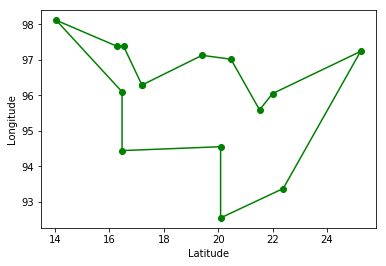

In [25]:
res_lat = []
res_lon = []
best.append(best[0])
for city_index in best:
    res_lat.append(LAT[city_index])
    res_lon.append(LON[city_index])
    
plt.plot(res_lat, res_lon, '-o', color='g')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()